<a href="https://colab.research.google.com/github/geryabra/DataVisualization/blob/main/Seaborn_Lesson_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn

In  previous lessons we've learned to use __Matplotlib__ to visualize

*   Line Plot
*   Histogram


In this lesson we wil learn how to use __Seaborn__ to visualize

*   Histogram
*   Box Plot
*   Violin Plot
*   Ridgline Plot
*   Scatter Plot
*   Bubble Plot



## Imports

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data

In [ ]:
taxis = sns.load_dataset('taxis', parse_dates=['pickup','dropoff'])
taxis.head(2)

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan

In [ ]:
taxis.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

## Counts Histograms - Using Seaborn

We will reproduce the same histogram we've created with Matplotlib in the previou lesson, but this time we will do it with __Seaborn__.

We will use the following parameters of `sns.histplot()`

*   data - the dataframe that contains the numeric column you want to plot
*   x (or y) - the column name of the numerical column, and whether you want to show the bars on the y or x axis
*   bins - the number of bin
*   binwidth - the width of the bins
*   edgcolor - the color of the bar's edge
*   kde - if True plots a smooth curve of the estimated distribution
*   hue - determine the color of plot elements.
*   stat - Aggregate statistic to compute in each bin.
  * count: show the number of observations in each bin.
  * frequency: show the number of observations divided by the bin width.
  * probability or proportion: normalize such that bar heights sum to 1.
  * percent: normalize such that bar heights sum to 100
  * density: normalize such that the total area of the histogram equals 1


Please ead [histplot's documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html) to find many many more parameters.

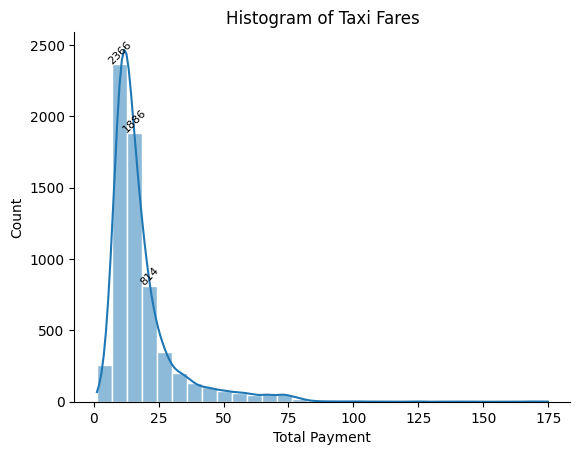

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram using Seaborn
ax = sns.histplot(data=taxis, x='total', bins=30, kde=True, edgecolor='white') ## , binwidth = 50, , binwidth = 5, kde=True , bins=30

# Annotate the histogram with the counts and rotate the text
for patch in ax.patches:
    height = patch.get_height()
    if height > 500:
        left_edge = patch.get_x()
        width = patch.get_width()
        bin_center = left_edge + width / 2
        ax.text(bin_center, height + 0.5, f'{int(height)}', ha='center',fontsize = 8, rotation=45) # ha means horizontal alignment


# Set the title and labels
ax.set_title('Histogram of Taxi Fares')
ax.set_xlabel('Total Payment')
ax.set_ylabel('Count')

# Set top and right spine as false
sns.despine()

# Show the plot
plt.show()


## Frequency Histogram - Using Seaborn

As we saw in the preious cell, `sns.histplot()` use as default counts of observations on the Y axis.<br>
To change the metric on the Y axis, we can use the parameter `stat`

* stat
  * count: show the number of observations in each bin.
  * frequency: show the number of observations divided by the bin width.
  * probability or proportion: normalize such that bar heights sum to 1.
  * percent: normalize such that bar heights sum to 100
  * density: normalize such that the total area of the histogram equals 1


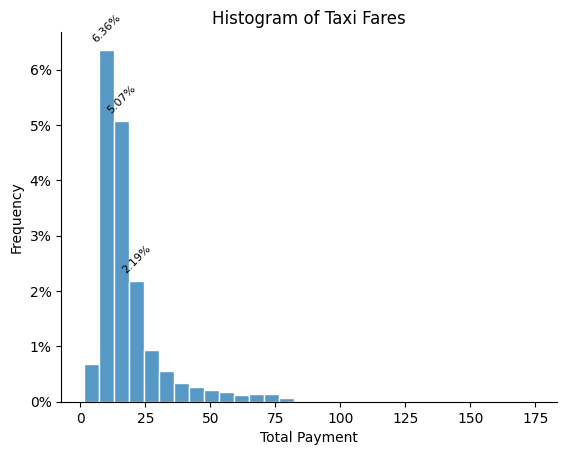

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram using Seaborn
sns.histplot(data=taxis, x='total', bins=30, edgecolor='white', stat='density') # , kde=True

# Annotate the histogram with the frequency and rotate the text
for patch in ax.patches:
    height = patch.get_height()
    if height > 0.01:
        left_edge = patch.get_x()
        width = patch.get_width()
        bin_center = left_edge + width / 2
        ax.text(bin_center, height + 0.001, f'{height:.2%}', ha='center', va='bottom', rotation=45, fontsize=8)

# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Set the title and labels
ax.set_title('Histogram of Taxi Fares')
ax.set_xlabel('Total Payment')
ax.set_ylabel('Frequency')

sns.despine()

# Show the plot
plt.show()


## Split the histogram by a Category Using `hue`

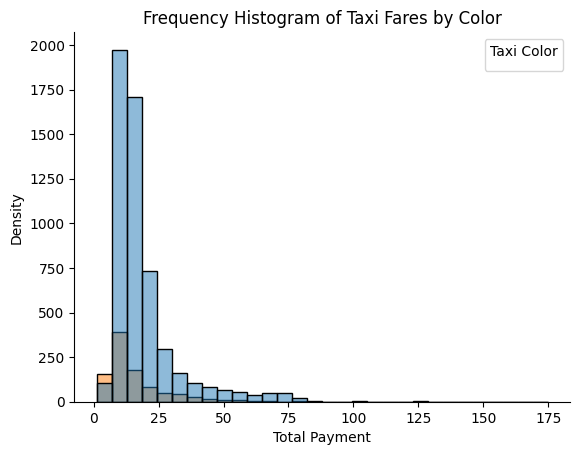

In [ ]:
# Load the 'taxis' dataset from Seaborn
taxis = sns.load_dataset('taxis')

# Create the figure and axes
fig, ax = plt.subplots()

# Plot a histogram using Seaborn with hue to differentiate taxi colors
sns.histplot(data=taxis, x='total', hue='color', bins=30, edgecolor='black', alpha=0.5)


# Set the title and labels
ax.set_title('Frequency Histogram of Taxi Fares by Color')
ax.set_xlabel('Total Payment')
ax.set_ylabel('Density')

# Add a legend
ax.legend(title='Taxi Color')

sns.despine()

# Show the plot
plt.show()


## Help me understand what went wrong here.

<ipython-input-4-4116608858>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Taxi Color')


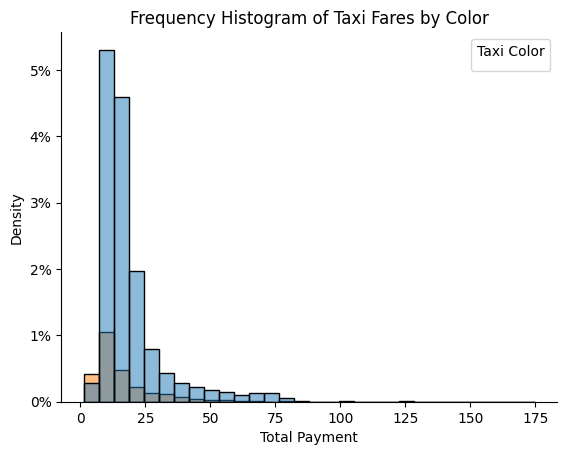

In [ ]:
# Load the 'taxis' dataset from Seaborn
taxis = sns.load_dataset('taxis')

# Create the figure and axes
fig, ax = plt.subplots()

# Define colors for each taxi color category
colors = {
    'yellow': 'gold',
    'green': 'green'
}

# Plot a histogram using Seaborn with hue to differentiate taxi colors
sns.histplot(data=taxis, x='total', hue='color', bins=30, stat='density', edgecolor='black', alpha=0.5) #, common_norm=False, ax=ax)

# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Set the title and labels
ax.set_title('Frequency Histogram of Taxi Fares by Color')
ax.set_xlabel('Total Payment')
ax.set_ylabel('Density')

# Add a legend
ax.legend(title='Taxi Color')
sns.despine()

# Show the plot
plt.show()


## Visualizing Cumulative Distribution w/ Seaborn

ECDF Plot Explanation

The line of code `sns.ecdfplot(data=taxis, x='total')` creates an Empirical Cumulative Distribution Function (ECDF) plot of the `total` column from the `taxis` DataFrame.

Unlike a histogram, which shows the frequency of values in bins, an ECDF plot displays the cumulative proportion of data points less than or equal to each x-value. This provides a clear view of the data distribution and helps answer questions like: *"What percentage of rides cost less than 50 units?"*

This type of plot is useful for comparing distributions, detecting skewness, and visualizing percentiles.


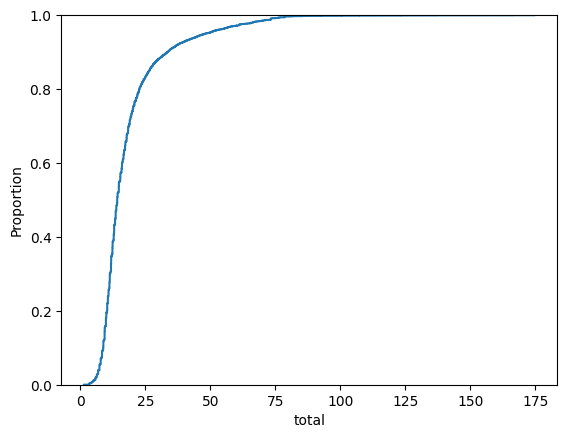

In [ ]:
ax = sns.ecdfplot(data=taxis, x= 'total')

### Densitiy Plots w/ Seaborn

<font color='blue'>__Behind the scene__</font> , an algorithm trys to estimate the density function. You can influence the way it does that using the parameter `bw_adjust` than takes values between 0 and 1

**📌 sns.kdeplot() – Kernel Density Estimation Plot:**  
Draws a smooth curve to estimate the data's distribution.  
You can control the smoothness using `bw_adjust`:  
- Lower values (e.g., 0.2) → sharper, more detailed curve  
- Higher values (e.g., 0.5) → smoother, broader curve


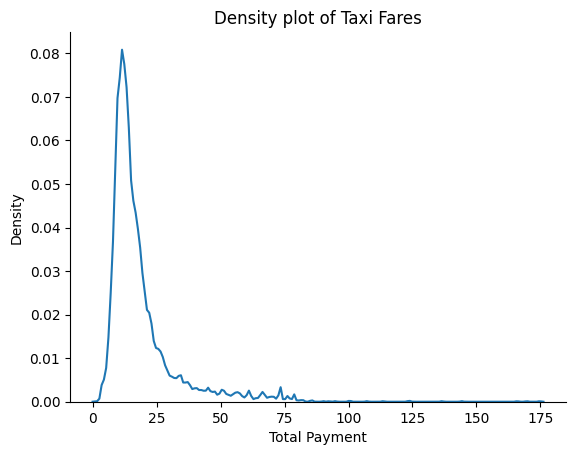

In [ ]:
# Assuming the taxi dataset is loaded into a DataFrame called taxi_df
# The taxi_df DataFrame should have a column named "Total"

# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram using Seaborn
ax = sns.kdeplot(data=taxis, x='total', bw_adjust=0.2)# or , bw_adjust=0.2

# Set the title and labels
ax.set_title('Density plot of Taxi Fares')
ax.set_xlabel('Total Payment')
ax.set_ylabel('Density')

sns.despine()
# Show the plot
plt.show()


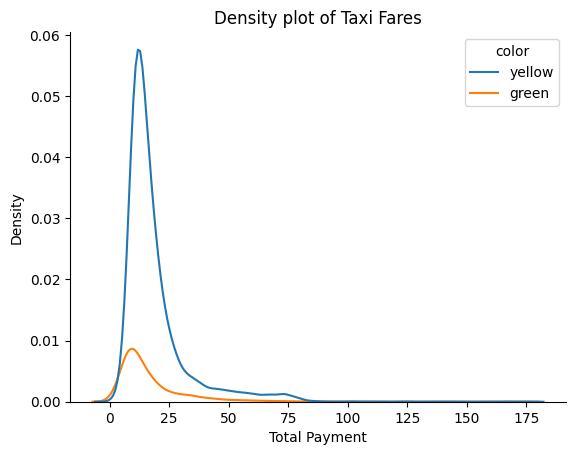

In [ ]:
# Assuming the taxi dataset is loaded into a DataFrame called taxi_df
# The taxi_df DataFrame should have a column named "Total"

# Create the figure and axes
fig, ax = plt.subplots()

# Create the histogram using Seaborn
ax = sns.kdeplot(data=taxis, x='total', hue='color')

# Set the title and labels
ax.set_title('Density plot of Taxi Fares')
ax.set_xlabel('Total Payment')
ax.set_ylabel('Density')

sns.despine()
# Show the plot
plt.show()


### Box Plot

Reminder

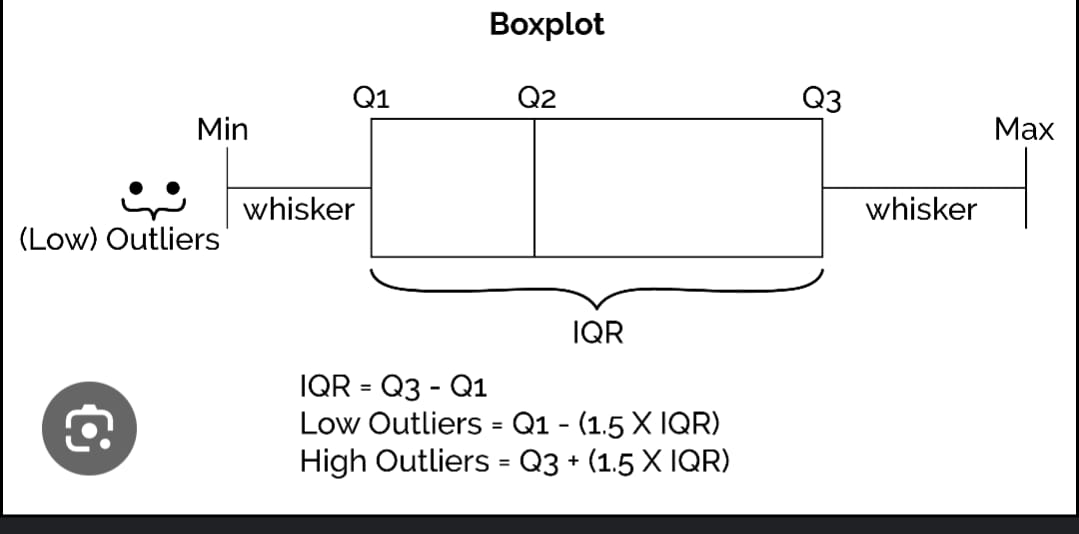

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

**📌 Boxplot – Identifying Outliers:**  
The box shows the interquartile range (Q1 to Q3), and the line inside is the median.  
Whiskers extend to values within 1.5 × IQR.  
**Points outside this range are considered outliers** and are displayed as small circles.  


**📌 Combined Boxplot and Histogram:**  
Creates a compact boxplot above a histogram to show both distribution and summary stats:

- `plt.subplots(2, sharex=True)` → aligns both plots on the same X-axis  
- `gridspec_kw={"height_ratios": (.15, .85)}` → small boxplot, larger histogram  
- Boxplot (`ax_box`) shows median, quartiles, and outliers  
- Histogram (`ax_hist`) shows frequency distribution  
- Extra code cleans up the boxplot to keep the visual focus on the histogram


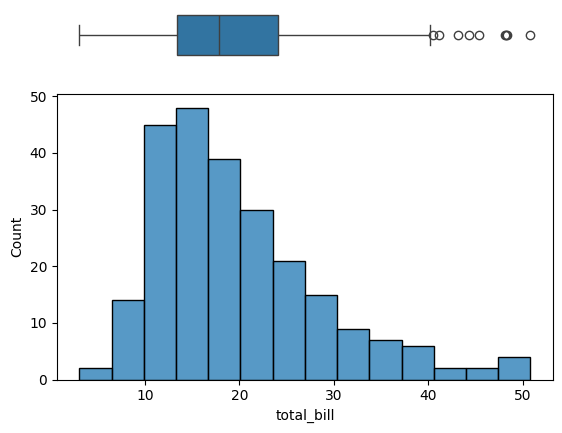

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
ax_box = sns.boxplot(data=tips, x = 'total_bill', ax=ax_box)
ax_hist = sns.histplot(data=tips, x="total_bill", ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
# Remove all spines in one line
for spine in ax_box.spines.values():
    spine.set_visible(False)

# Removing top and right borders
# sns.despine(bottom=True, left=True)

#Hides axis ticks on the left (Y-axis) and bottom (X-axis).
ax_box.tick_params(left=False, bottom=False)
plt.show()

## Horizontal Box Plot

using x=

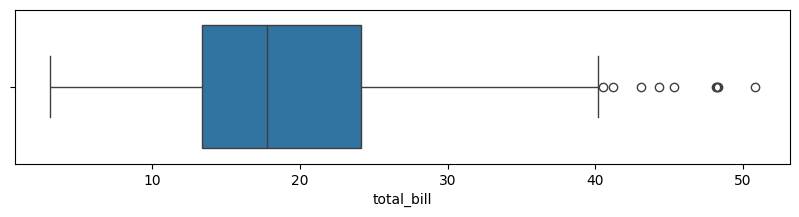

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 2))

# Create the box plot
ax = sns.boxplot(data=tips, x='total_bill')

# Show the plot
plt.show()

## Vertical Box Plot

using y=

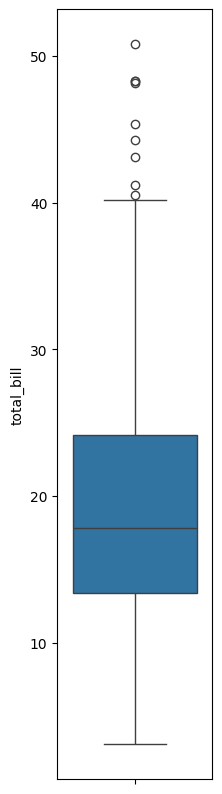

In [ ]:
# Create a figure with a narrow height
fig, ax = plt.subplots(figsize=(2, 10))  # Width is 10, height is 2

# Create the box plot
ax = sns.boxplot(data=tips, y='total_bill')

# Show the plot
plt.show()

## Box Plot by Category

A box plot split by category helps:

* Compare Distributions: Easily see differences in medians, spreads, and ranges across categories.
* Identify Outliers: Spot unusual data points within each category.
* Detect Patterns: Understand trends and behaviors in different groups.
* Assess Variability: Compare data variability (IQR) between categories.

Lets see an example:

In the following plot, the x axis shows different measures of a cancer tumor.<br> The color inidcates a benign or malignant tumor.

Lets imagine you want to create a model that can classify the tumors to benign or malignant - the box plot allows you to guess which features are more likely to contribute to the ability to classify.

As much as the orange and blue boxes are separte - the more it is likely that this feature can help us predict.

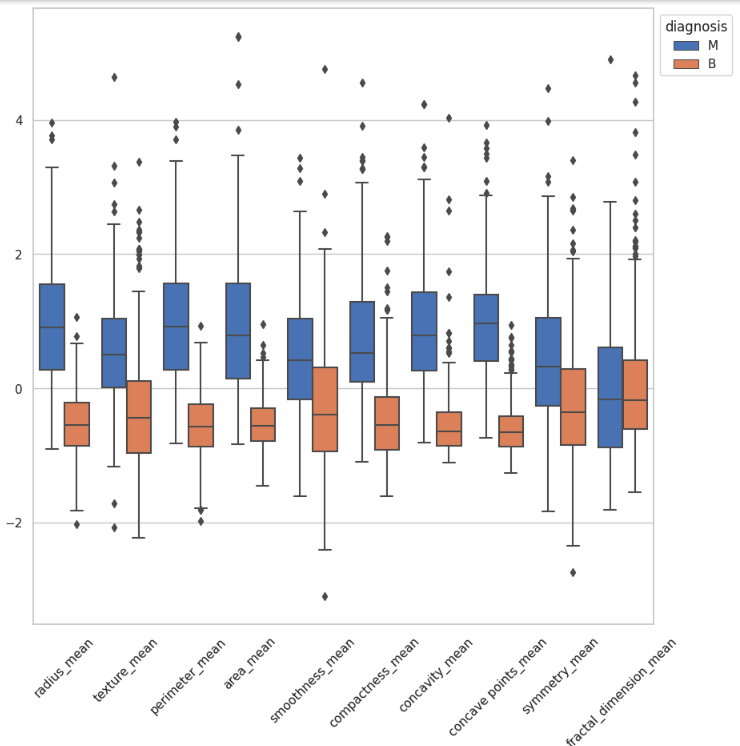

This boxplot shows `total_bill` distribution per day

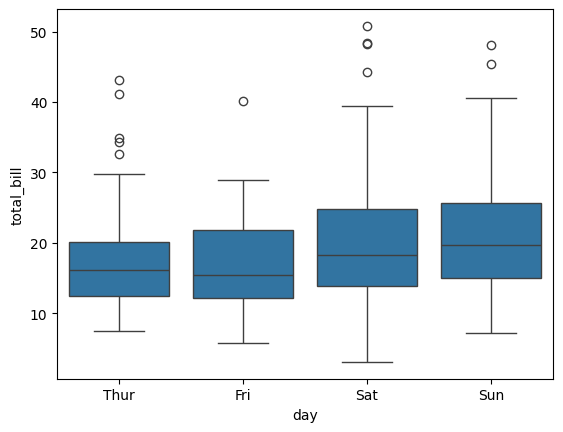

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the box plot
ax = sns.boxplot(data=tips, x='day', y='total_bill')
plt.show()
plt.close()

**📌 Annotated Boxplot with Group Counts:**  

- `groupby('day').size()` counts the number of observations per day  
- `ax.text()` adds `n=...` below each box  
- `plt.tight_layout()` ensures layout fits all text nicely


<ipython-input-9-1174895471>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nobs = tips.groupby("day").size().reset_index(name='counts')


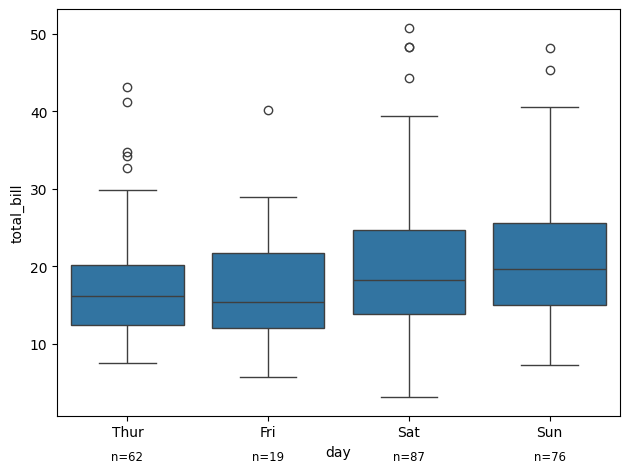

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the box plot
ax = sns.boxplot(data=tips, x='day', y='total_bill')

# Calculate number of observations per group
nobs = tips.groupby("day").size().reset_index(name='counts')

# print(ax.get_xticklabels().get_text())
# Get the x-axis tick labels
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Iterate through each day to place the annotations
for i, day in enumerate(x_labels):
  #Extracting group size from a filtered DataFrame
    count = nobs[nobs['day'] == day]['counts'].values[0]
    # `x=i`, `y=-5` → position of the text (below each box)
    ax.text(i, -5, f'n={count}', ha='center', size='small', color='black')

# Adjust the plot to fit the annotations
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
nobs

day  counts
0  Thur      62
1   Fri      19
2   Sat      87
3   Sun      76

In [ ]:
nobs[nobs['day'] == 'Sun']['counts'].values[0]

np.int64(76)

In [ ]:
# nobs[nobs['day'] == 'Thur']['counts'].values[0]
nobs

day  counts
0  Thur      62
1   Fri      19
2   Sat      87
3   Sun      76

## Adding Stripplot to BoxPlot

**📌 sns.stripplot(): Raw value scatter over categories**  
Draws individual data points for each category.

- `jitter=0.2` adds horizontal spread to avoid overlap - Adds small random horizontal noise to spread out overlapping points.

- `size=2.5` keeps points small and readable  
- `color="orange"` gives a uniform style  
- `ax=ax` draws on top of an existing plot (e.g., boxplot)  


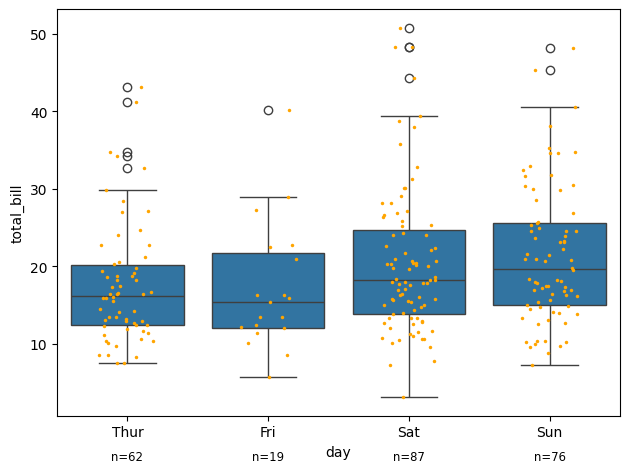

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the box plot
ax = sns.boxplot(x='day', y='total_bill', data=tips, ax=ax)

# Add the strip plot
ax_2 = sns.stripplot(x='day', y='total_bill', data=tips, color="orange", jitter=0.2, size=2.5, ax=ax)

# Calculate number of observations per group
nobs = tips.groupby("day").size().reset_index(name='counts')

# Get the x-axis tick labels
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Iterate through each day to place the annotations
for i, day in enumerate(x_labels):
    count = nobs[nobs['day'] == day]['counts'].values[0]
    ax.text(i, -5, f'n={count}', ha='center', size='small', color='black')

# Adjust the plot to fit the annotations
plt.tight_layout()

# Show the plot
plt.show()


## Splitting

This visualization provides a clear and concise summary of the distribution of total_bill values across different days, and it distinguishes between smokers and non-smokers.

By using the `hue` parameter to differentiate smokers from non-smokers, you can compare the distribution of total bills between these two groups for each day.

In [ ]:
tips.sample(5)

total_bill    tip     sex smoker   day    time  size
140       17.47   3.50  Female     No  Thur   Lunch     2
170       50.81  10.00    Male    Yes   Sat  Dinner     3
80        19.44   3.00    Male    Yes  Thur   Lunch     2
45        18.29   3.00    Male     No   Sun  Dinner     2
124       12.48   2.52  Female     No  Thur   Lunch     2

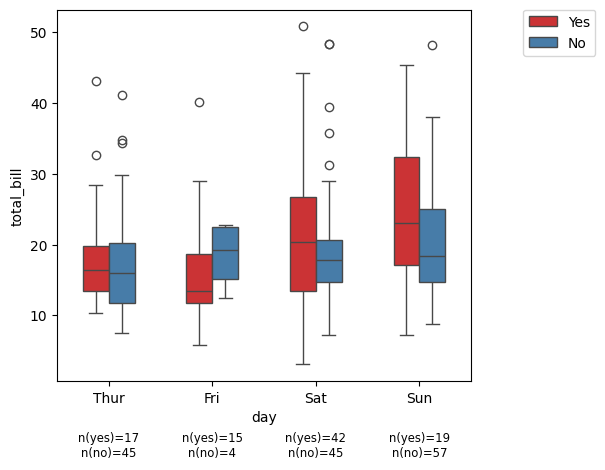

In [ ]:
fig, ax = plt.subplots()

# Create the box plot
ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set1", width=0.5)

# Count the number of observations per group
nobs = tips.groupby(["day", "smoker"]).size().reset_index(name='counts')

# Get the x-axis tick labels
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Iterate through each day and smoker status to place the annotations
#This loop adds two-line annotations under each day, showing how many observations are for smokers and non-smokers:
for (i, day) in enumerate(x_labels):
      count = nobs[(nobs['day'] == day)] #['counts'].values[0] #  & (nobs['smoker'] == smoker)
      count_stirg = f'n(yes)={count[count.smoker == "Yes"]["counts"].values[0]}\nn(no)={count[count.smoker == "No"]["counts"].values[0]}'
      ax.text(i, -10, f'{count_stirg}', ha='center', size='small', color='black')

# Adjust the legend position
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0.)

# Adjust the plot to fit the annotations
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
nobs

day smoker  counts
0  Thur    Yes      17
1  Thur     No      45
2   Fri    Yes      15
3   Fri     No       4
4   Sat    Yes      42
5   Sat     No      45
6   Sun    Yes      19
7   Sun     No      57

## Violin Plot

Same plot we saw earlier with the boxes, only this time with violins
The color inidcates a benign or malignant tumor

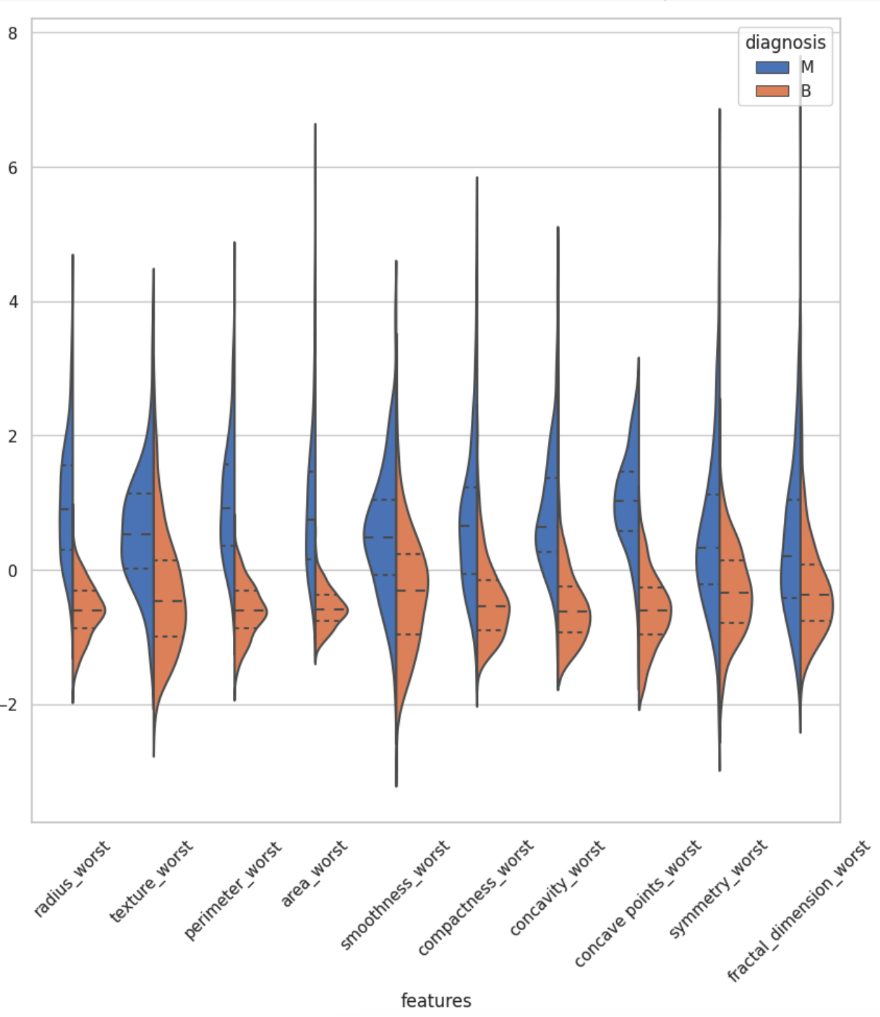




Reminder

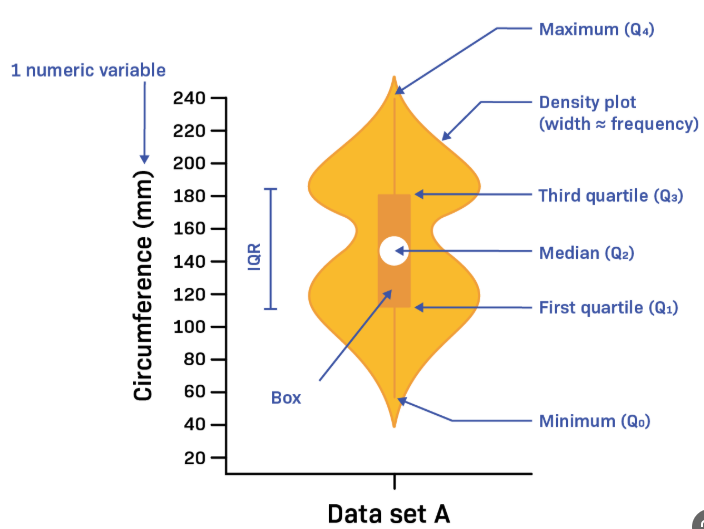

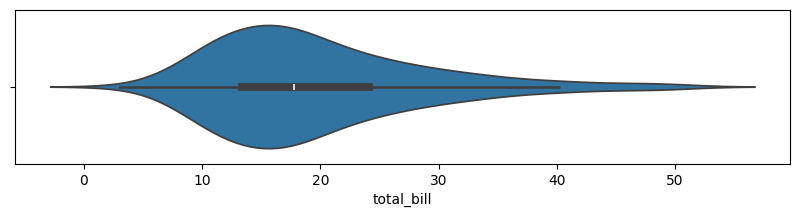

In [ ]:
# Create a figure with a narrow height
fig, ax = plt.subplots(figsize=(10, 2))  # Width is 10, height is 2

# Create the violin plot
ax = sns.violinplot(data=tips, x='total_bill')

# Show the plot
plt.show()


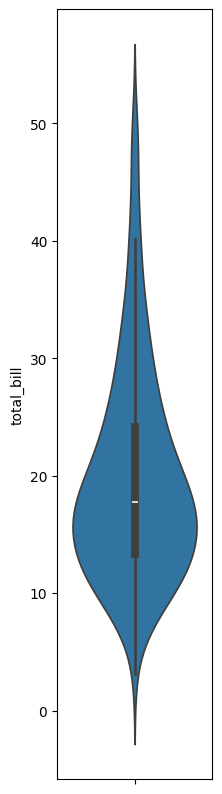

In [ ]:
# Create a figure with a narrow height
fig, ax = plt.subplots(figsize=(2, 10))  # height is 10, Width is 2

# Create the violin plot
ax = sns.violinplot(data=tips, y='total_bill')

# Show the plot
plt.show()


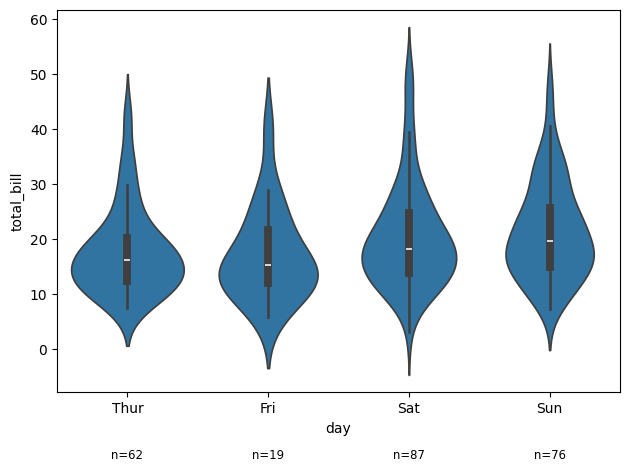

In [ ]:
# Create the violin plot
fig, ax = plt.subplots()
ax = sns.violinplot(x="day", y="total_bill", data=tips, ax=ax)

# Calculate the number of observations per group
nobs = tips.groupby("day").size().reset_index(name='counts')

# Get the x-axis tick labels
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Iterate through each day to place the annotations
for i, day in enumerate(x_labels):
    count = nobs[nobs['day'] == day]['counts'].values[0]
    ax.text(i, -20, f'n={count}', ha='center', size='small', color='black')

# Adjust the plot to fit the annotations
plt.tight_layout()

# Show the plot
plt.show()


**📌 Combined Violin and Box Plot**

This visualization overlays a boxplot on top of a violin plot to show both distribution and summary stats.

- `sns.violinplot(...)` creates a smooth distribution curve for each category:
  - `inner=None` hides inner markers like quartiles or individual points, so the violin shape remains clean.
  - `color='0.9'` sets a light gray fill for the violin shapes.

- `sns.boxplot(..., ax=ax)` overlays a slim boxplot on top of the violins:
  - `width=0.2` narrows the box so it fits neatly inside the violin shape.
  - `showfliers=False` hides outlier points (which can clutter the visual).
  - `boxprops={'facecolor':'None'}` makes the box background transparent, so the underlying violin plot remains visible.

This combination shows both the **shape of the data distribution** and **summary statistics** for each group.

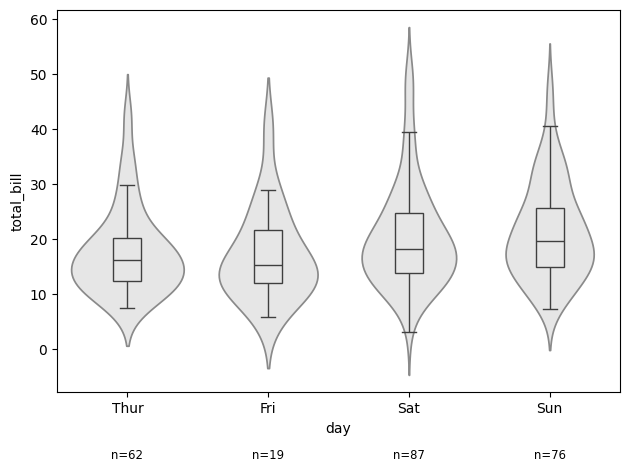

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots()

# Create the violin plot
ax = sns.violinplot(x="day", y="total_bill", data=tips, inner=None, color='0.9')

# Overlay a box plot
sns.boxplot(x="day", y="total_bill", data=tips, width=0.2, showfliers=False,
            boxprops={'facecolor':'None'}, ax=ax)

# Calculate the number of observations per group
nobs = tips.groupby("day").size().reset_index(name='counts')

# Get the x-axis tick labels
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Iterate through each day to place the annotations
for i, day in enumerate(x_labels):
    count = nobs[nobs['day'] == day]['counts'].values[0]
    ax.text(i, -20, f'n={count}', ha='center', size='small', color='black')

# Adjust the plot to fit the annotations
plt.tight_layout()

# Show the plot
plt.show()


## Split Violin by Category

using hue

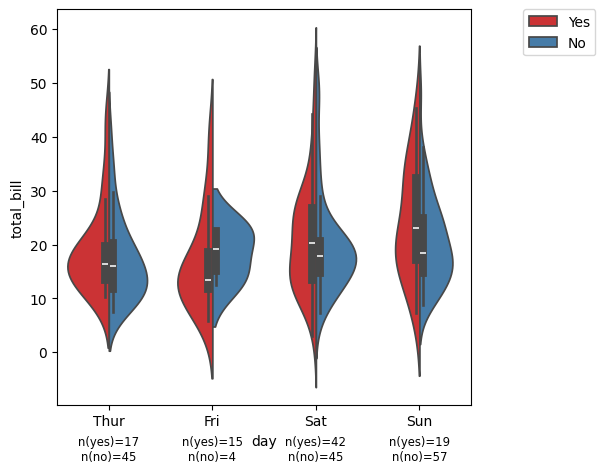

In [ ]:
# Create the violin plot
fig, ax = plt.subplots()

# Create the violin plot
ax = sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set1", split=True)

# Count the number of observations per group
nobs = tips.groupby(["day", "smoker"]).size().reset_index(name='counts')

# Get the x-axis tick labels
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Iterate through each day and smoker status to place the annotations
for (i, day) in enumerate(x_labels):
    count = nobs[nobs['day'] == day]
    count_string = f'n(yes)={count[count.smoker == "Yes"]["counts"].values[0]}\nn(no)={count[count.smoker == "No"]["counts"].values[0]}'
    ax.text(i, -20, f'{count_string}', ha='center', size='small', color='black')

# Adjust the legend position
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), borderaxespad=0.)

# Adjust the plot to fit the annotations
plt.tight_layout()

# Show the plot
plt.show()


### Ridge Line plot

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

**📌 Ridge Plot using Seaborn FacetGrid:**

- Sorts data by category for consistent order
- Uses `FacetGrid(row='species')` to draw one KDE per row
- Fills KDEs with transparency and aligns them on a baseline (`y=0`)
- Removes axis clutter and adds custom text labels
- Adds a shared title and adjusts spacing


- `plt.subplots_adjust(top=0.9, hspace=0.2)`  
  Adds space for the main title and adjusts vertical spacing between facets.

- Loop with `ax.text(...)` adds the category name (e.g., species) next to each subplot:  
  - `transform=ax.transAxes` uses relative Axes coordinates  
  - `(-0.1, 0.8)` positions the text to the left of the plot  
  - Font is bold and centered vertically for clarity

- `g.fig.suptitle(...)` adds a main title for the entire plot layout.


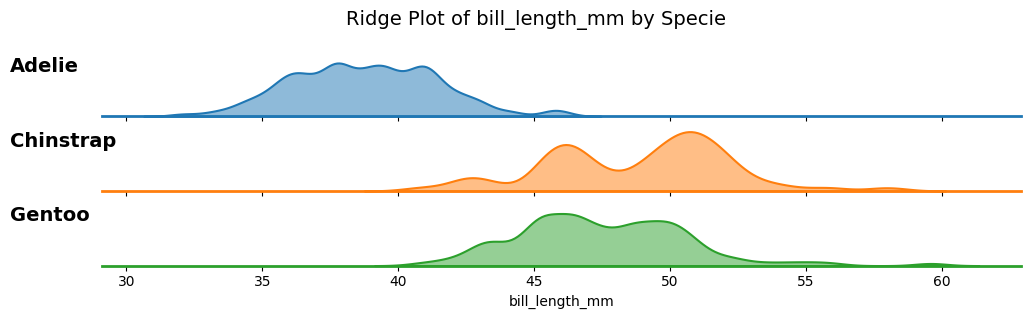

In [ ]:
# Sort DataFrame by the 'day' column for better visualization
penguins = penguins.sort_values('species')


# Create a FacetGrid, mapping a kdeplot to each "day" level
g = sns.FacetGrid(penguins, row='species', hue='species', aspect=10, height=1, palette='tab10')

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, 'bill_length_mm',
      bw_adjust=0.5, clip_on=False,
      fill=True, alpha=0.5, linewidth=1.5)

# Create the "ridge" effect (colored line) by overlapping plots
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Adjust space at the top for the title
plt.subplots_adjust(top=0.9, hspace=0.2)

# Loop through each facet to add a text annotation for each day
for ax, title in zip(g.axes.flat, penguins['species'].unique()):
    ax.text(-0.1, 0.8, title, transform=ax.transAxes, fontweight="bold", fontsize=14, va="center")

# Add a title to the figure
g.fig.suptitle('Ridge Plot of bill_length_mm by Specie', va='bottom', ha='center', fontsize=14)

plt.show()

**📌 Comparing Two Versions of Ridge Plot:**

🔸 In the original plot:
- `hue='species'` → each row had its own color
- good for simple distribution overview

🔸 In the updated version:
- `hue='sex'` → allows comparison between male and female **within each species**
- adds legend with `g.add_legend(title='sex')` to clarify color meaning


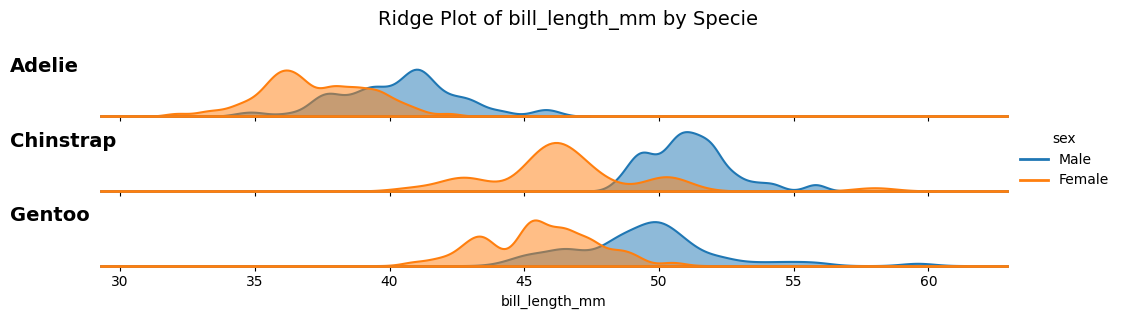

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'penguins' DataFrame is already loaded
# Sort DataFrame by the 'day' column for better visualization
penguins = penguins.sort_values('species')

# Create a FacetGrid, mapping a kdeplot to each "day" level
g = sns.FacetGrid(penguins, row='species', hue='sex', aspect=10, height=1, palette='tab10')

# Map the kdeplot to the FacetGrid
g.map(sns.kdeplot, 'bill_length_mm',
      bw_adjust=0.5, clip_on=False,
      fill=True, alpha=0.5, linewidth=1.5)

# Create the "ridge" effect by overlapping plots
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Adjust space at the top for the title
plt.subplots_adjust(top=0.9, hspace=0.2)

# Loop through each facet to add a text annotation for each day
for ax, title in zip(g.axes.flat, penguins['species'].unique()):
    ax.text(-0.1, 0.8, title, transform=ax.transAxes, fontweight="bold", fontsize=14, va="center")

# Add a title to the figure
g.fig.suptitle('Ridge Plot of bill_length_mm by Specie', va='bottom', ha='center', fontsize=14)

# Add a legend to the figure
g.add_legend(title='sex')

plt.show()


## Visualizing Relationships


<font color='blue'>__What does it mean to visualize a relationship?__</font><br>
Well, it means to see with our eyes how one variable effect another variable.<br>
There are two great plots that visualize relationship:

*   Scatter Plot
*   Line Plot

These datasets were taken from Gap Minder<br>
The `life_exp` dataset has one row per year per country<br>


In [ ]:
life_exp = pd.read_csv('/content/drive/MyDrive/Datasets/Life Expectancy Data.csv')
gdp_per_cap = pd.read_csv('/content/drive/MyDrive/Datasets/gdp_per_capita.csv')
world_pop = pd.read_csv('/content/drive/MyDrive/Datasets/world_population.csv')
gdp = pd.read_csv('/content/drive/MyDrive/Datasets/gdp.csv')

In [ ]:
life_exp.sample(10)

Country  Year      Status  Life expectancy   Adult Mortality  \
1676    Mauritius  2006  Developing              71.8            165.0   
2174  Saint Lucia  2009  Developing              74.3            147.0   
2213        Samoa  2002  Developing              76.0            174.0   
2927     Zimbabwe  2010  Developing              52.4            527.0   
2534  Switzerland  2002   Developed              84.0             74.0   
1656   Mauritania  2010  Developing              62.0            214.0   
2523  Switzerland  2013   Developed              83.0             52.0   
1855  New Zealand  2005   Developed              79.9             78.0   
1415   Kyrgyzstan  2010  Developing              68.8            199.0   
360        Brazil  2007  Developing              73.3            159.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1676              0     3.73              502.384495         97.0         3   
2174              0    11.09                0.000000         95.0         0   
2213              0     3.30              208.168844         86.0         0   
2927             29     5.21               53.308581          9.0      9696   
2534              0    10.85             6853.628494          NaN         0   
1656              8     0.01                8.353075         64.0      1292   
2523              0     9.73            19099.045060          NaN       175   
1855              0     9.31              491.055852         87.0        20   
1415              4     2.73                0.000000         96.0         0   
360              65     7.19              394.932130         99.0         0   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS           GDP  \
1676  ...   98.0               4.38         97.0        0.1   5695.969327   
2174  ...   95.0               8.12         95.0        0.1           NaN   
2213  ...   85.0               5.10         86.0        0.1   1631.417270   
2927  ...   89.0               5.37         89.0       15.7    713.635620   
2534  ...   95.0               1.61         93.0        0.1  41336.721920   
1656  ...   52.0               3.28         64.0        1.2    123.383675   
2523  ...   96.0              11.71         96.0        0.1  84658.887680   
1855  ...   89.0               8.25         89.0        0.1   2775.895150   
1415  ...   88.0               6.66         96.0        0.1           NaN   
360   ...   99.0               8.28         99.0        0.1   7313.557962   

      Population   thinness  1-19 years   thinness 5-9 years  \
1676   1233996.0                    7.6                  7.5   
2174         NaN                    4.3                  4.4   
2213    176582.0                    0.2                  0.2   
2927   1486317.0                    7.1                  7.0   
2534   7284753.0                    0.6                  0.5   
1656    369543.0                    8.7                  8.5   
2523    889346.0                    0.4                  0.3   
1855         NaN                    0.3                  0.3   
1415         NaN                    3.2                  3.3   
360   19126637.0                    3.1                  3.0   

      Income composition of resources  Schooling  
1676                            0.713       13.4  
2174                            0.717       12.7  
2213                            0.653       12.1  
2927                            0.436       10.0  
2534                            0.890       15.2  
1656                            0.484        7.6  
2523                            0.934       15.8  
1855                            0.886       18.9  
1415                            0.631       12.2  
360                             0.700       13.5  

[10 rows x 22 columns]

In [ ]:
life_exp.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
#Clean column names for coding convenience
life_exp.columns = [x.lower().lstrip().rstrip().replace(' ','_') for x in life_exp.columns]

In [ ]:
life_exp.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [ ]:
life_exp_2015 = life_exp[life_exp.year == 2015][['country', 'status','life_expectancy']]

In [ ]:
life_exp_2015.reset_index().head(10)

index              country      status  life_expectancy
0      0          Afghanistan  Developing             65.0
1     16              Albania  Developing             77.8
2     32              Algeria  Developing             75.6
3     48               Angola  Developing             52.4
4     64  Antigua and Barbuda  Developing             76.4
5     80            Argentina  Developing             76.3
6     96              Armenia  Developing             74.8
7    112            Australia   Developed             82.8
8    128              Austria   Developed             81.5
9    144           Azerbaijan  Developing             72.7

In [ ]:
gdp.head()

Country Name Code          1960          1961          1962  \
0                        Aruba  ABW           NaN           NaN           NaN   
1  Africa Eastern and Southern  AFE  1.931311e+10  1.972349e+10  2.149392e+10   
2                  Afghanistan  AFG  5.377778e+08  5.488889e+08  5.466667e+08   
3   Africa Western and Central  AFW  1.040428e+10  1.112805e+10  1.194335e+10   
4                       Angola  AGO           NaN           NaN           NaN   

           1963          1964          1965          1966          1967  ...  \
0           NaN           NaN           NaN           NaN           NaN  ...   
1  2.573321e+10  2.352744e+10  2.681057e+10  2.915216e+10  3.017317e+10  ...   
2  7.511112e+08  8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09  ...   
3  1.267652e+10  1.383858e+10  1.486247e+10  1.583285e+10  1.442643e+10  ...   
4           NaN           NaN           NaN           NaN           NaN  ...   

           2012          2013          2014          2015          2016  \
0  2.534637e+09  2.727850e+09  2.790849e+09  2.962905e+09  2.983637e+09   
1  9.505214e+11  9.642424e+11  9.848071e+11  9.199300e+11  8.733549e+11   
2  1.990732e+10  2.014640e+10  2.049713e+10  1.913421e+10  1.811656e+10   
3  7.275714e+11  8.207876e+11  8.649666e+11  7.607297e+11  6.905430e+11   
4  1.280529e+11  1.367099e+11  1.457122e+11  1.161936e+11  1.011239e+11   

           2017          2018          2019          2020  Unnamed: 65  
0  3.092430e+09  3.202189e+09           NaN           NaN          NaN  
1  9.853557e+11  1.012853e+12  1.009910e+12  9.207923e+11          NaN  
2  1.875347e+10  1.805323e+10  1.879945e+10  2.011614e+10          NaN  
3  6.837416e+11  7.416916e+11  7.945725e+11  7.845876e+11          NaN  
4  1.221238e+11  1.013532e+11  8.941719e+10  5.837598e+10          NaN  

[5 rows x 64 columns]


Sets a global display format for float numbers in pandas
- Always shows 5 digits after the decimal point  
- Example: `3.1` → `3.10000`  




In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [ ]:
gdp_2015 = gdp[['Country Name', '2015']]

In [ ]:
gdp_2015.head()

Country Name               2015
0                        Aruba   2962905027.93296
1  Africa Eastern and Southern 919930022724.42200
2                  Afghanistan  19134211763.85900
3   Africa Western and Central 760729687146.57397
4                       Angola 116193649124.15100

In [ ]:
merged_df_1 = pd.merge(life_exp_2015, gdp_2015, how = 'inner', left_on = 'country', right_on = 'Country Name')

In [ ]:
#remove country name column
merged_df_1 = merged_df_1.drop(['Country Name'],axis=1)

In [ ]:
#rename a column using .rename()
merged_df_1 = merged_df_1.rename(columns={"2015": "gdp"}, errors="raise")

In [ ]:
merged_df_1.head()

country      status  life_expectancy                gdp
0          Afghanistan  Developing         65.00000  19134211763.85900
1              Albania  Developing         77.80000  11386850129.84110
2              Algeria  Developing         75.60000 165979279263.17401
3               Angola  Developing         52.40000 116193649124.15100
4  Antigua and Barbuda  Developing         76.40000   1336692592.59259

In [ ]:
world_pop.head()

Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  
0           63.05870      1.02570                      0.52000  
1           98.87020      0.99570                      0.04000  
2           18.85310      1.01640                      0.56000  
3          222.47740      0.98310                      0.00000  
4          170.56410      1.01000                      0.00000

In [ ]:
world_pop.columns = [x.lower().lstrip().rstrip().replace(' ','_') for x in world_pop.columns]


In [ ]:
world_pop.columns

Index(['rank', 'cca3', 'country/territory', 'capital', 'continent',
       '2022_population', '2020_population', '2015_population',
       '2010_population', '2000_population', '1990_population',
       '1980_population', '1970_population', 'area_(km²)', 'density_(per_km²)',
       'growth_rate', 'world_population_percentage'],
      dtype='object')

In [ ]:
world_pop = world_pop.rename(columns={"country/territory": "country"}, errors="raise")

In [ ]:
world_pop.head()

rank cca3         country           capital continent  2022_population  \
0    36  AFG     Afghanistan             Kabul      Asia         41128771   
1   138  ALB         Albania            Tirana    Europe          2842321   
2    34  DZA         Algeria           Algiers    Africa         44903225   
3   213  ASM  American Samoa         Pago Pago   Oceania            44273   
4   203  AND         Andorra  Andorra la Vella    Europe            79824   

   2020_population  2015_population  2010_population  2000_population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990_population  1980_population  1970_population  area_(km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   density_(per_km²)  growth_rate  world_population_percentage  
0           63.05870      1.02570                      0.52000  
1           98.87020      0.99570                      0.04000  
2           18.85310      1.01640                      0.56000  
3          222.47740      0.98310                      0.00000  
4          170.56410      1.01000                      0.00000

In [ ]:
world_pop_to_merge = world_pop[['country', 'continent', '2015_population']].rename(columns={"2015_population": "population"}, errors="raise")

In [ ]:
world_pop_to_merge.head()

country continent  population
0     Afghanistan      Asia    33753499
1         Albania    Europe     2882481
2         Algeria    Africa    39543154
3  American Samoa   Oceania       51368
4         Andorra    Europe       71746

In [ ]:
df = pd.merge(merged_df_1, world_pop_to_merge, how = 'inner', on = 'country')

In [ ]:
df['gdp_per_capita'] = df.gdp / df.population

In [ ]:
df.head()

country      status  life_expectancy                gdp  \
0          Afghanistan  Developing         65.00000  19134211763.85900   
1              Albania  Developing         77.80000  11386850129.84110   
2              Algeria  Developing         75.60000 165979279263.17401   
3               Angola  Developing         52.40000 116193649124.15100   
4  Antigua and Barbuda  Developing         76.40000   1336692592.59259   

       continent  population  gdp_per_capita  
0           Asia    33753499       566.88084  
1         Europe     2882481      3950.36433  
2         Africa    39543154      4197.42136  
3         Africa    28127721      4130.93009  
4  North America       89941     14861.88271

In [ ]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Scatter Plot


*  Visualize relationship between two __numeric__ variables with dots
*  For each dot the value of one variable is positioned on the `x` axis and the value of the other variable is positioned on the `y` axis
*  <font color='blue'>__Use it__</font> when you want to discover a pattern (for example more years of education results in higher salary)

Scatterlot expects us to to give it at least 3 paramaeters

*   `data` - the dataframe
*   `x` & `y` - two columns from the dataframe
***
### <font color='blue'>__Question:__</font> what is the relationship betwen gdp & life expectancy?
***



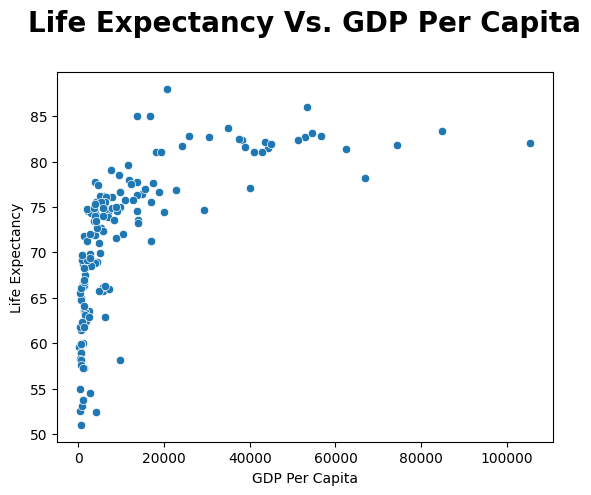

In [ ]:
sns.scatterplot(data=df, x='gdp_per_capita', y='life_expectancy')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Vs. GDP Per Capita\n', fontsize = 20, fontweight='bold')
plt.show()

***
💡 <font color='blue'>__Insights__</font>
***

1.   The relationship between GDP and Life Expectancy is not linear and positive
2. It behaves as if it has an asymptot
3.   If you already have high GDP, adding a bit GDP will not increase much  Life Expectancy


#### 😒 we could have done that with pandas

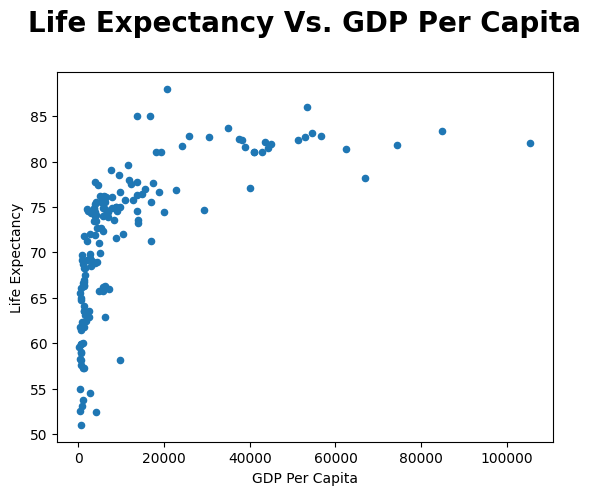

In [ ]:
df.plot(kind='scatter', x='gdp_per_capita', y='life_expectancy')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Vs. GDP Per Capita\n', fontsize = 20, fontweight='bold')
plt.show()

🙂 <font color='red'>__But!__</font> we couldn't have done the following with pandas (at least not easily)

Just pluging in a categorical column name to the `hue` parameter and each dot gets colored by the category it is belong to

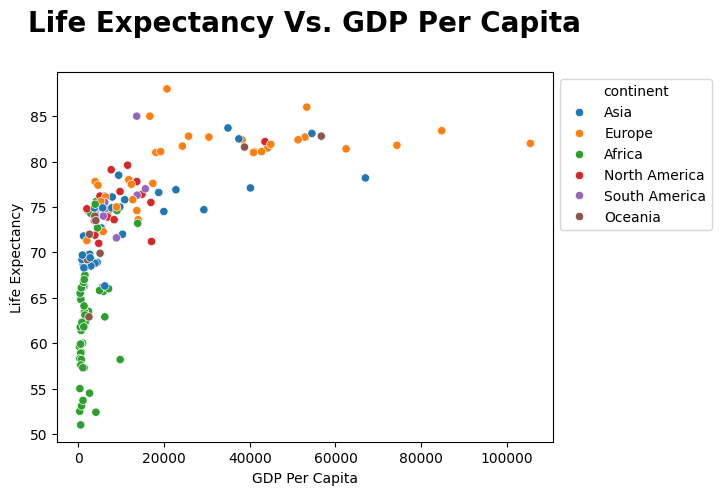

In [ ]:
ax = sns.scatterplot(data=df, x='gdp_per_capita', y='life_expectancy', hue= 'continent')
# ax = sns.scatterplot(data=df, x='gdp_per_capita', y='life_expectancy', hue= 'continent', style='continent')
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Vs. GDP Per Capita\n', fontsize = 20, fontweight='bold')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

***
💡 <font color='blue'>__Insights__</font>
***

5.   African countries have low GDP and low Life Expectancy
6.   European countries have higher Life Expectancy


<font color='blue'>__If we want to insert a fourth variable__</font> we can use the size parameter to create a Bubble Plot, where the size of the dot represents the value of the third variable

<font color='red'>__Remember__</font> it is more difficult for us to read area, so use the size of the bubble for the variable that is less important for you out of the three you want to visualize

The color here is a categorical, but can be also a numerical
***

In [ ]:
df.sort_values(by=['population'], ascending=False)

country      status  life_expectancy                  gdp  \
30                 China  Developing         76.10000 11061553079871.50000   
63                 India  Developing         68.30000  2103587813812.75000   
64             Indonesia  Developing         69.10000   860854235065.07898   
106             Pakistan  Developing         66.40000   270556131701.17099   
20                Brazil  Developing         75.00000  1802211999538.67993   
..                   ...         ...              ...                  ...   
54               Grenada  Developing         73.60000      997007925.92593   
74              Kiribati  Developing         66.30000      171117816.66613   
140                Tonga  Developing         73.50000      437006227.16278   
122           Seychelles  Developing         73.20000     1377495054.04127   
4    Antigua and Barbuda  Developing         76.40000     1336692592.59259   

         continent  population  gdp_per_capita  
30            Asia  1393715448      7936.73708  
63            Asia  1322866505      1590.17392  
64            Asia   259091970      3322.58169  
106           Asia   210969298      1282.44315  
20   South America   205188205      8783.21441  
..             ...         ...             ...  
54   North America      118980      8379.62621  
74         Oceania      116707      1466.21725  
140        Oceania      106122      4117.96072  
122         Africa       99240     13880.44190  
4    North America       89941     14861.88271  

[153 rows x 7 columns]

### Bubble Plot


- `sns.scatterplot(..., hue='continent', size='population')`  
  Encodes color by continent and bubble size by population.

- `sizes=(40, 4000)` controls the min/max bubble sizes.

- `ax.get_legend_handles_labels()` captures legend items  
  and `plt.legend(...)` restricts to continent labels only.

- `sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))`  
  Moves the legend outside the plot for clarity.


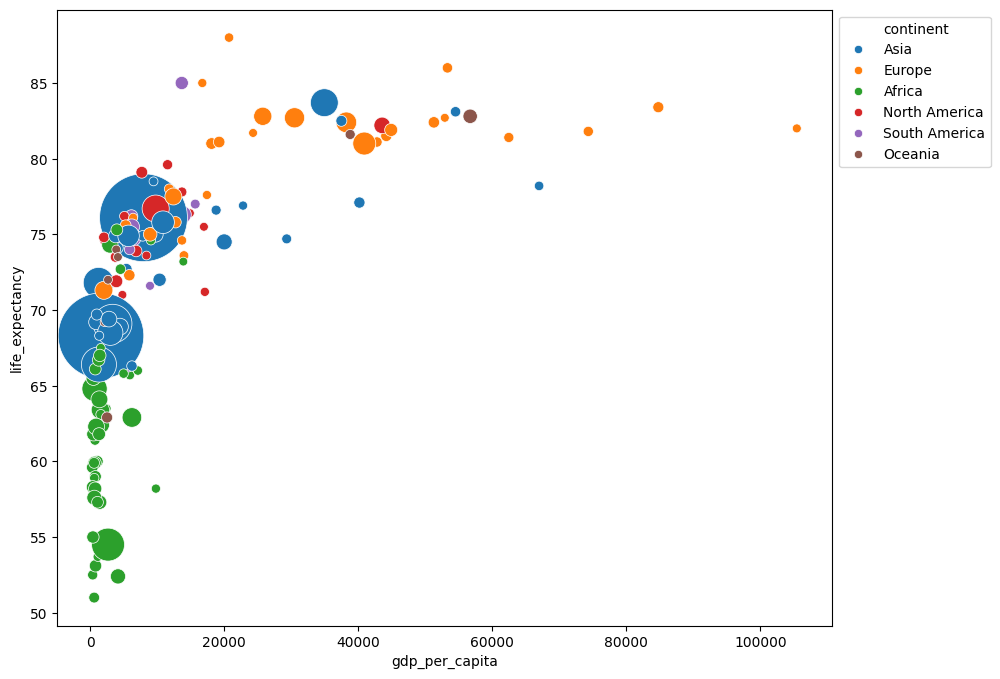

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(data=df, x='gdp_per_capita', y='life_expectancy', hue= 'continent', size = 'population',sizes=(40, 4000))
h,l = ax.get_legend_handles_labels()
plt.legend(h[0:(df.nunique().continent+1)],l[0:(df.nunique().continent+1) ])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()


**📌 Adding points with arrows using plt.annotate():**

Adds labeled arrows to highlight key data points:

- `xy=(x, y)` → where the arrow points  
- `xytext=(x_text, y_text)` → where the label appears  
- `arrowprops` defines the arrow style and curvature  
- `connectionstyle='arc3,rad=.5'` draws a curved arrow for better aesthetics  


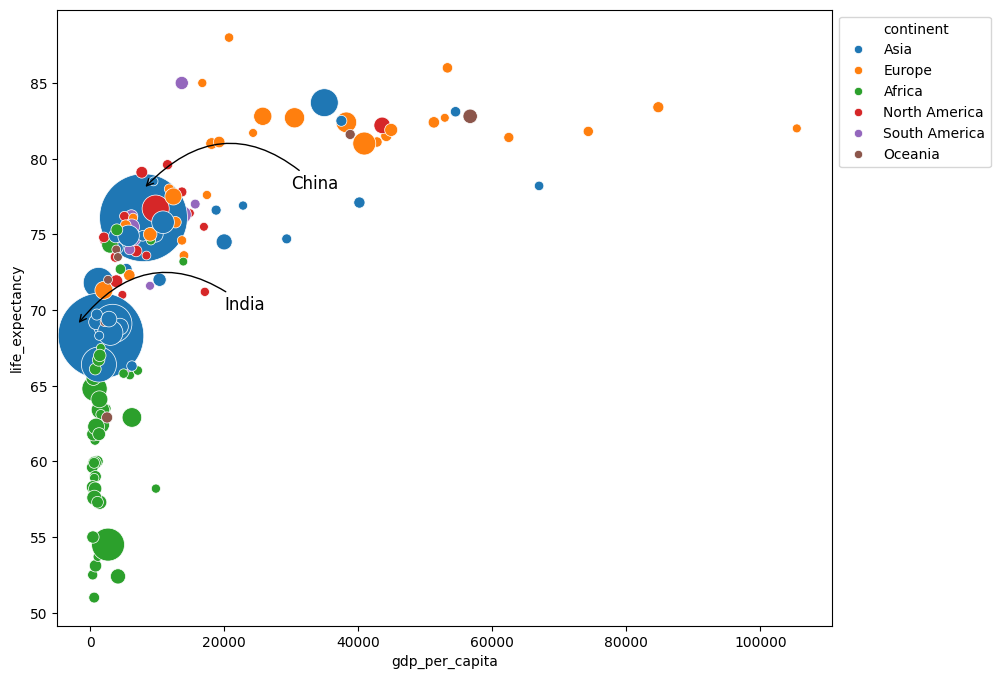

In [ ]:

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=df, x='gdp_per_capita', y='life_expectancy', hue='continent', size='population', sizes=(40, 4000))

# Adjust the legend
h, l = ax.get_legend_handles_labels()
plt.legend(h[0:(df['continent'].nunique() + 1)], l[0:(df['continent'].nunique() + 1)])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Add annotations with arrows
plt.annotate('China', xy=(7936, 78), xytext=(30000, 78),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.5'), fontsize=12)
plt.annotate('India', xy=(-2000, 69), xytext=(20000, 70),
             arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=.5'), fontsize=12)

plt.show()


**📌 Scatter Plot with Log Scales**

- `plt.xscale('log')`, `plt.yscale('log')`  
  Transform axes to logarithmic scale — useful when data spans wide ranges (e.g., GDP).

- `alpha=0.7` makes overlapping bubbles semi-transparent.

- `plt.text(...)` directly places text labels near key countries,  
  without arrows (simpler but effective).



Why logarithmic scale?

*  You can see the small and the large together on the same scale.

*   Reduces the impact of extreme values ​​(such as countries with extremely high GDP).\




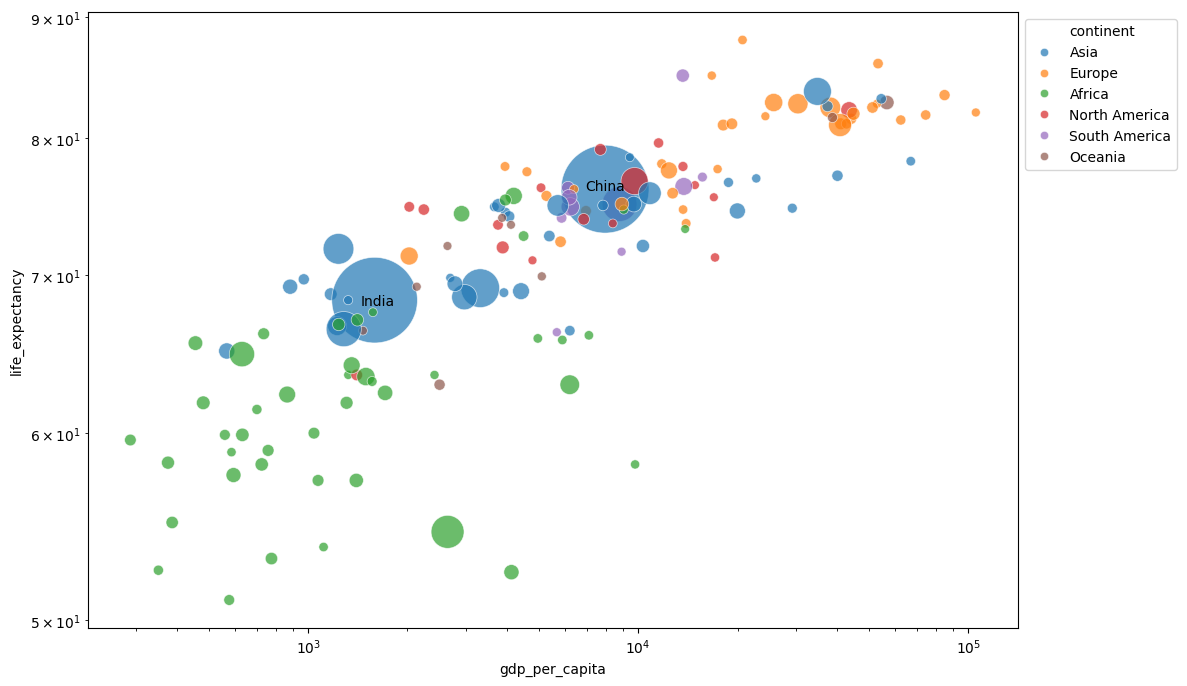

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(data=df, x='gdp_per_capita', y='life_expectancy', hue= 'continent', size = 'population',sizes=(40, 4000), alpha=0.7)
plt.xscale('log')
plt.yscale('log')

h,l = ax.get_legend_handles_labels()
plt.legend(h[0:(df.nunique().continent+1)],l[0:(df.nunique().continent+1) ])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.text(7936-1000, 76, 'China')
plt.text(1590-150, 68, 'India')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
from google.colab import drive

### Bar Chart


In [ ]:
import numpy as np
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


*   Shows the relationship between a categoric variable and a numeric variable
*   Each vlaue from the categorical variable is a bar
*   The length of the bar is proportionate to the numerical value

<font color='blue'>__Two Questions:__</font>
<br>

*   what kind of summary does Seaborn do to the numerical variable?
*   what are these black lines in the top of the bars?


`average` is the default summary Seaborn does for our numerical variable in `sns.barplot`, but you can control it and change it through the `estimator` variable.

For `estimator` we can use different values

*   Sum
*   Size - the number of observations
*   median
*   lambda functions (example: `lambda x: np.percentile(x, 75)`)
*   or any custom function you want
*   and more...


The black lines in the top of the bars are the errorbars. The default of the `errorbar` parameter is the 95% Confidence Interval (ci), but also this variable can be modified to calculate the errorbar according to different methods:<br>

*   ci
*   se
*   sd

[see documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html)

by stating `errorbar=None` you can get rid of the error bar







confidence interval formula:

Screenshot 2024-07-01 at 0.32.38.png

standard deviation formula:

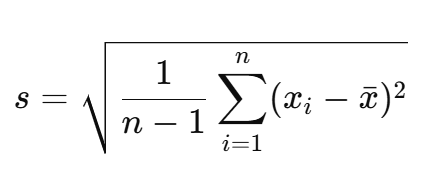

### 📌 Explanation of Terms

- **s** — The **sample standard deviation**. This is the value shown by the error bar. It measures how spread out the data is around the mean in each group.

- **x_i** — Each individual value of `petal_length` in the group. These are the data points used to calculate the mean and standard deviation.

- **bar{x}** — The **sample mean** of the `petal_length` values in the group. This is the height of each bar in the plot.

- **n ** — The **number of observations** (i.e., the number of data points) in the group.


standard error formula:

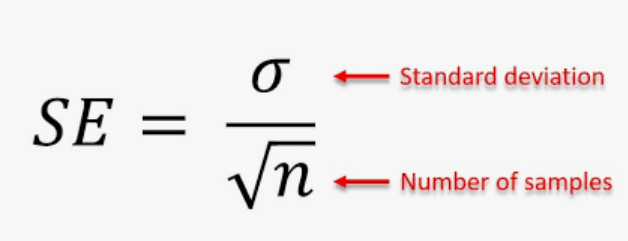

**📌 Error Bars in Seaborn:**

Error bars show uncertainty or variability in the data.  
By default, Seaborn uses 95% Confidence Intervals (`errorbar="ci"`),  
but you can choose other options:

- `errorbar="ci"` → Confidence Interval (default, e.g. 95%)  
- `errorbar="se"` → Standard Error  
- `errorbar="sd"` → Standard Deviation  
- `errorbar=None` → No error bars


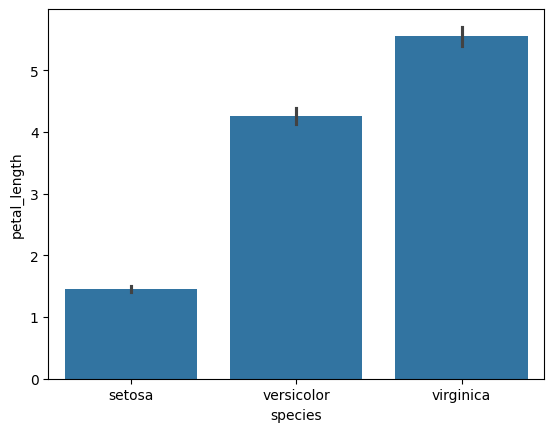

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length')

changing the estimator

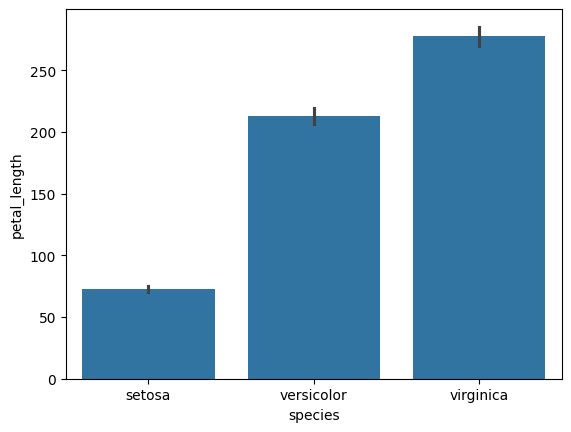

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator=sum, errorbar='ci')

taking smaller sample

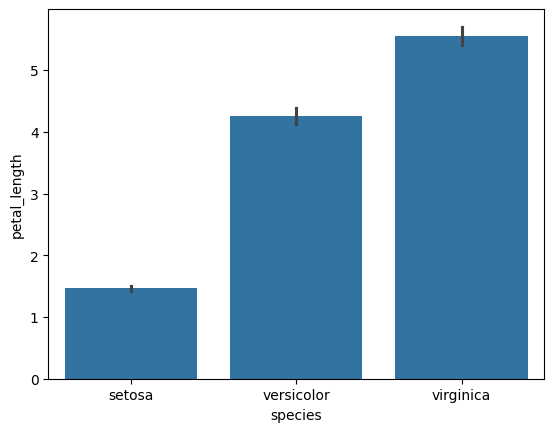

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator='mean', errorbar='ci')

**📌 Barplot with Undersampled Class:**

1. Selects only 33% of `'virginica'` samples (undersampling)  
2. Keeps all other species as-is  
3. Combines the data and plots average `petal_length` per species  
4. Uses `errorbar='ci'` to display 95% confidence intervals


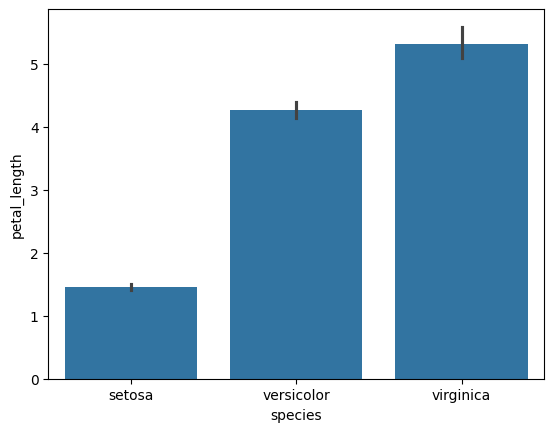

In [ ]:
virginica = iris[iris['species'] == 'virginica']
third_virginica = virginica.sample(frac=0.33)

# Filter the remaining species
non_virginica = iris[iris['species'] != 'virginica']

# Combine the datasets
modified_iris = pd.concat([non_virginica, third_virginica])

# Create the bar plot
ax = sns.barplot(data=modified_iris, x='species', y='petal_length', estimator='mean', errorbar='ci')
plt.show()

chagning confidnce level

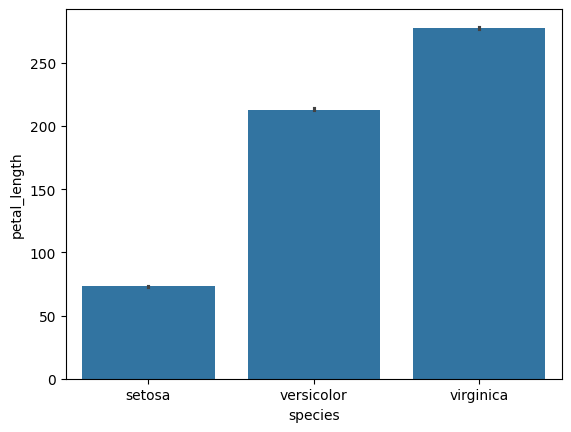

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator=sum, errorbar=('ci', 20))

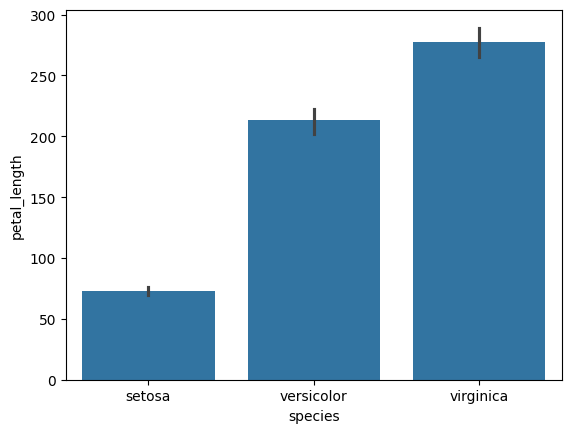

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator=sum, errorbar=('ci', 99.99))

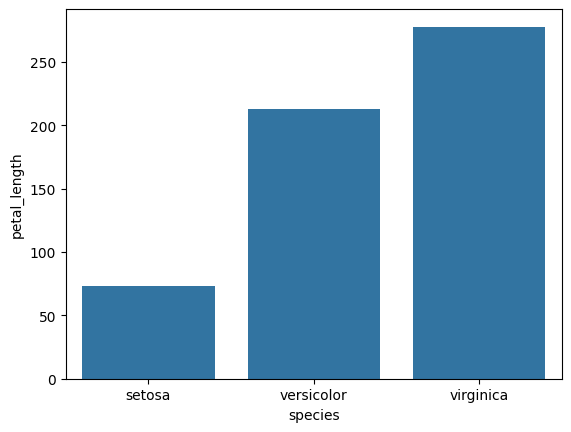

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator=sum, errorbar='se')

### Change the orientation

Just switch between `x` and `y`

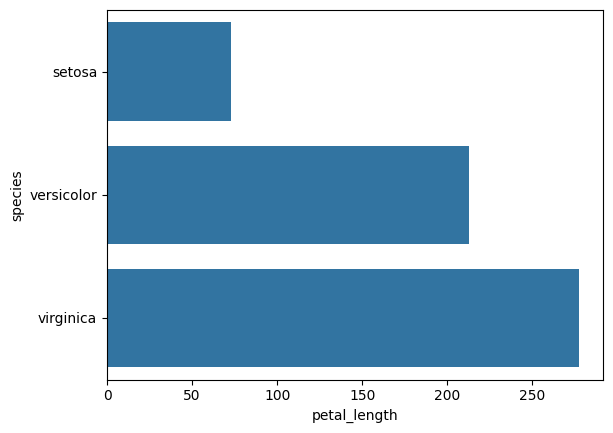

In [ ]:
ax = sns.barplot(data=iris, y='species', x='petal_length', estimator=sum, errorbar=None)

### Using a lambda function as the estimator

In [ ]:
iris.petal_length

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [ ]:
iris.petal_length.groupby(iris.species).apply(lambda x: np.percentile(x, 75))

species
setosa        1.575
versicolor    4.600
virginica     5.875
Name: petal_length, dtype: float64

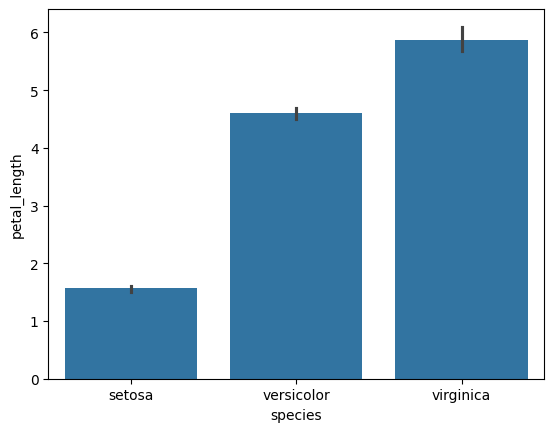

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator=lambda x: np.percentile(x, 75),errorbar="ci")

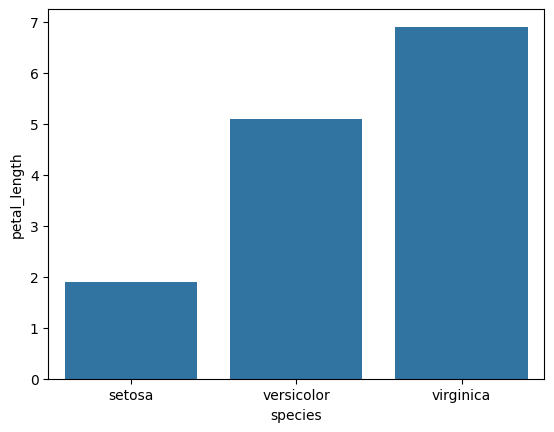

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator=lambda x: np.max(x),errorbar=None)

the 20th highest value

In [ ]:
petal_length_array = iris['petal_length'].to_numpy()
sorted_petal_length= np.sort(petal_length_array)

# Access the 20th last element
twentieth_last_value = sorted_petal_length[-20]
print(twentieth_last_value)

6.9


**📌 Custom estimator in sns.barplot():**  
This barplot uses a lambda function to display the **20th largest value** of `petal_length` for each species (instead of the mean).  
If the group has only one value, it returns that value.  
`errorbar=None` disables error bars for clarity.


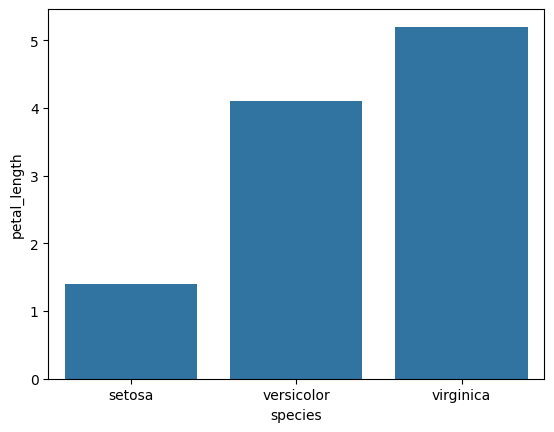

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator=lambda x: np.sort(x)[-20] if len(x) > 1 else x[0], errorbar=None)


### Just counting how many observations for each category

Two options:

*   barplot + estimator=np.size
*   sns.countplot(data=iris, x='species')



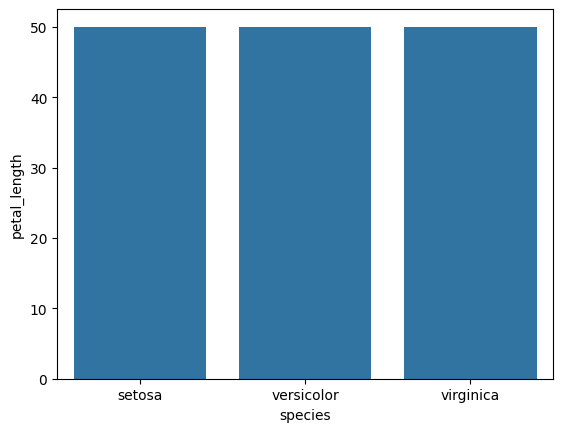

In [ ]:
ax = sns.barplot(data=iris, x='species', y='petal_length', estimator=np.size)

In [ ]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

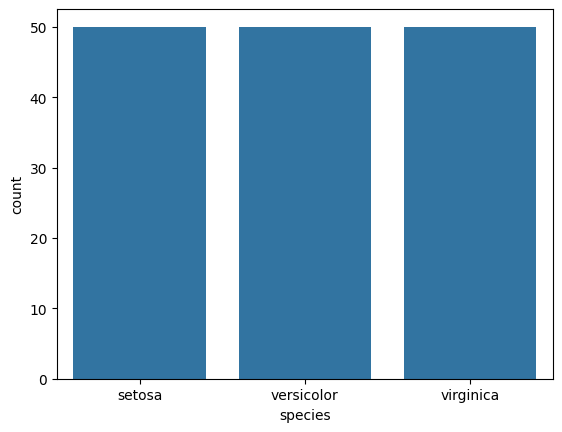

In [ ]:
ax = sns.countplot(data=iris, x='species')




### Lets make it beautiful

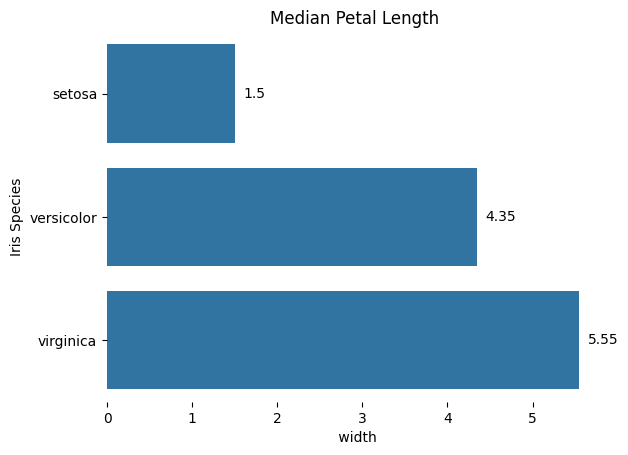

In [ ]:
barplot = sns.barplot(data=iris, y='species', x='petal_length', estimator='median', errorbar=None)

for spine in barplot.spines.values():
    spine.set_visible(False)


for p in barplot.patches:
    width = p.get_width()  # Get the width of the bar
    plt.text(x=width+0.1,  # Position the text slightly right of the bar end##2.85
             y=p.get_y() + p.get_height() / 2,  # Position text at the vertical center of the bar
             s=f'{width.round(2)}',  # The text to display, which is the width (value)
             va='center')  # Center the text vertically

# Set the title and labels
barplot.set_title('Median Petal Length')
barplot.set_xlabel(' width')
barplot.set_ylabel('Iris Species')

plt.show()

In [ ]:
median_petal_length = iris['petal_length'].median()

# Create a new column 'median_reference'
iris['median_reference'] = iris['petal_length'].apply(lambda x: 'above' if x > median_petal_length else 'below')

In [ ]:
iris.sample(10)

sepal_length  sepal_width  petal_length  petal_width     species  \
134           6.1          2.6           5.6          1.4   virginica   
72            6.3          2.5           4.9          1.5  versicolor   
102           7.1          3.0           5.9          2.1   virginica   
38            4.4          3.0           1.3          0.2      setosa   
132           6.4          2.8           5.6          2.2   virginica   
2             4.7          3.2           1.3          0.2      setosa   
32            5.2          4.1           1.5          0.1      setosa   
127           6.1          3.0           4.9          1.8   virginica   
105           7.6          3.0           6.6          2.1   virginica   
58            6.6          2.9           4.6          1.3  versicolor   

    median_reference  
134            above  
72             above  
102            above  
38             below  
132            above  
2              below  
32             below  
127            above  
105            above  
58             above

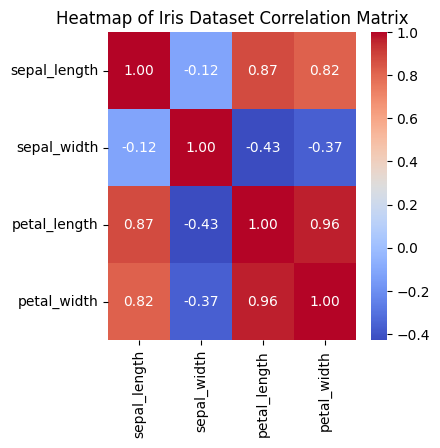

In [ ]:

# Compute the correlation matrix, excluding the 'species' column
correlation_matrix = iris.drop(columns=['species','median_reference']).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Iris Dataset Correlation Matrix')
plt.show()


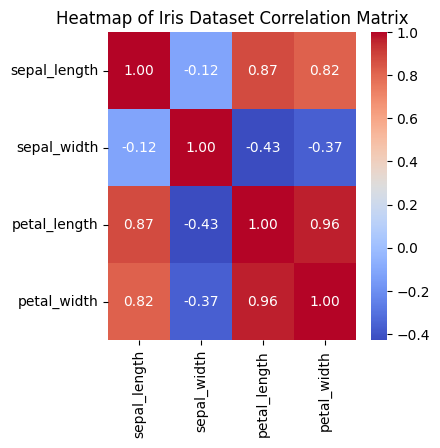

In [ ]:



# Add the 'species' column to the DataFrame
iris['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# Compute the correlation matrix, excluding the 'species' column
correlation_matrix = iris.drop(columns=['species']).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Iris Dataset Correlation Matrix')
plt.show()


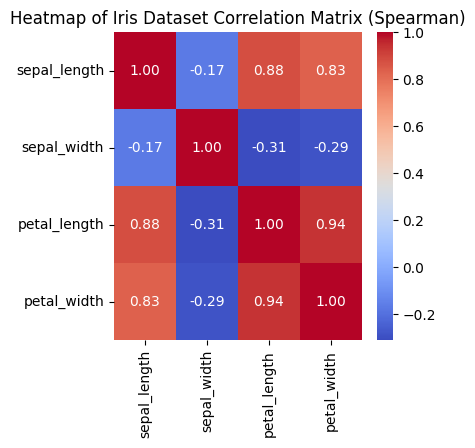

In [ ]:
correlation_matrix = iris.drop(columns=['species']).corr(method='spearman')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Iris Dataset Correlation Matrix (Spearman)')
plt.show()

# qq plot

**📈 Reminder: What is a Q-Q Plot?**

A Q-Q (Quantile-Quantile) plot is a graphical tool used to compare the distribution of a dataset to a theoretical distribution (e.g., normal, exponential).  
If the data points fall roughly along the diagonal line, it suggests that the data follows the target distribution.


**📊 Normal Q-Q Plot with `stats.probplot`**

This line generates a Q-Q (quantile-quantile) plot to visually assess whether the `petal_width` data follows a normal distribution.

- `petal_width` – the data being tested  
- `dist="norm"` – specifies the theoretical distribution to compare against (normal distribution)  
- `plot=plt` – uses Matplotlib (`plt`) to render the plot


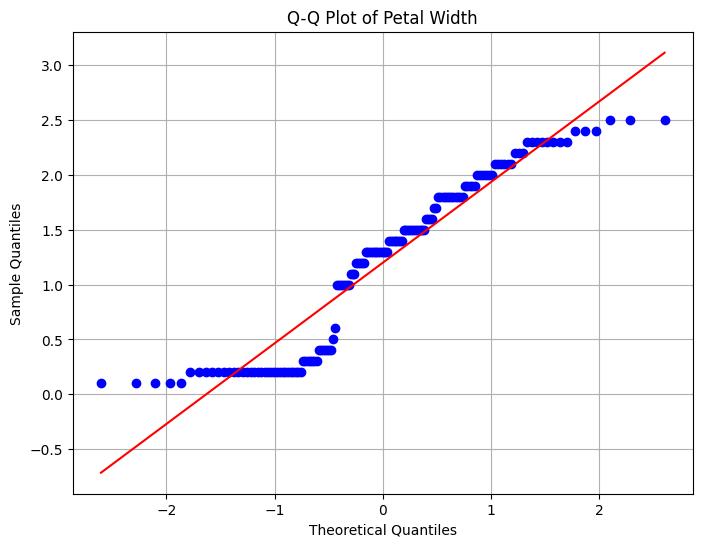

In [ ]:

import scipy.stats as stats


# Extract the petal_width column
petal_width = iris['petal_width']

# Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(petal_width, dist="norm", plot=plt)
plt.title('Q-Q Plot of Petal Width')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


**📊 Q-Q Plot against Exponential Distribution**

- `dist="expon"` – sets the reference distribution to the exponential distribution  

🔍 If the points closely follow the diagonal line, it suggests that the data fits an exponential distribution.


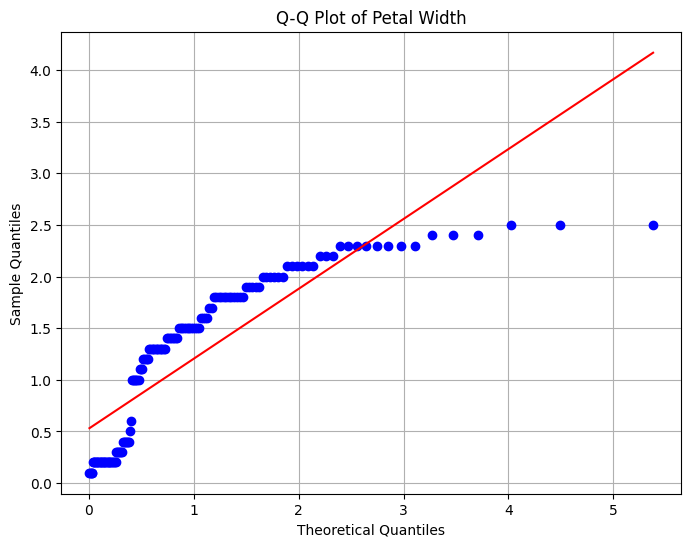

In [ ]:

import scipy.stats as stats


# Extract the petal_width column
petal_width = iris['petal_width']

# Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(petal_width, dist="expon", plot=plt)
plt.title('Q-Q Plot of Petal Width')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


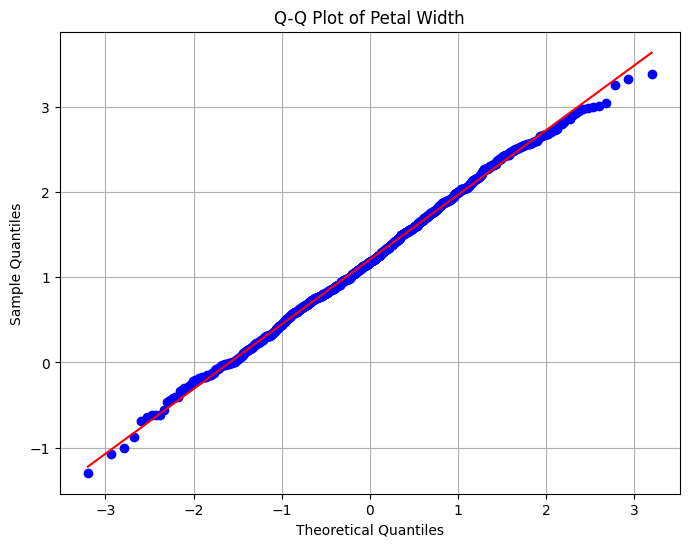

In [ ]:
mean = np.mean(petal_width)
std_dev = np.std(petal_width)

petal_width = np.random.normal(loc=mean, scale=std_dev, size=1000)
# Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(petal_width, dist="norm", plot=plt)
plt.title('Q-Q Plot of Petal Width')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()





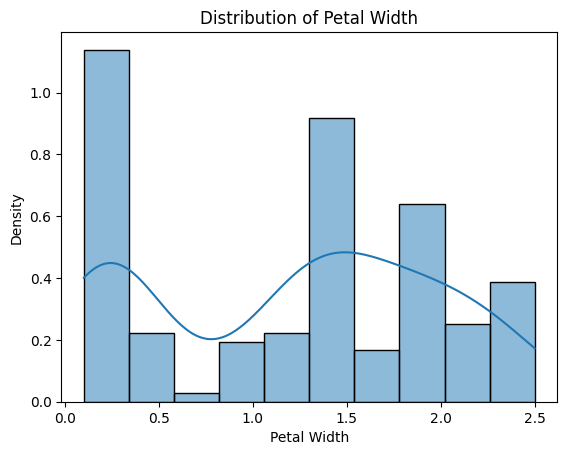

In [ ]:
sns.histplot(petal_width, kde=True, bins=10, stat="density")
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Density')



plt.show()

### Grouped Bar Chart

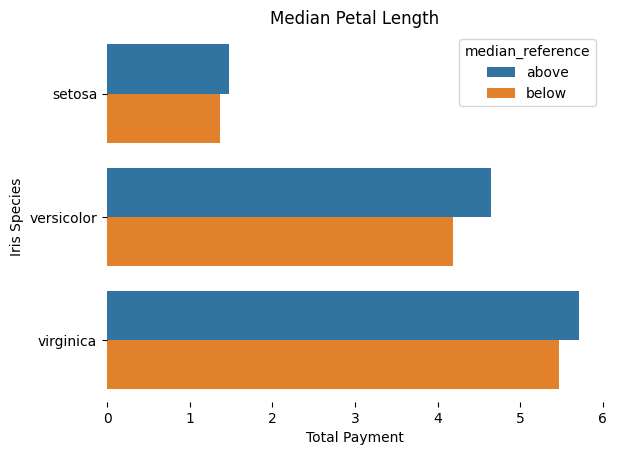

In [ ]:
percentile_75_petal_length = iris['sepal_width'].quantile(0.5)

# Create a new column 'median_reference'
iris['median_reference'] = iris['sepal_width'].apply(lambda x: 'above' if x > percentile_75_petal_length else 'below')

barplot = sns.barplot(data=iris, y='species', x='petal_length', hue ='median_reference', errorbar=None)

for spine in barplot.spines.values():
    spine.set_visible(False)


# for p in barplot.patches:
#     height = p.get_height()  # Get the width of the bar
#     x_pos = p.get_x()  # Get the width of the bar
#     plt.text(x=x_pos,  # Position the text slightly right of the bar end
#              y=height + 1, # / 2,  # Position text at the vertical center of the bar
#              s=f'{round(height,2)}',  # The text to display, which is the width (value)
#              va='center')  # Center the text vertically

# Set the title and labels
barplot.set_title('Median Petal Length')
barplot.set_xlabel('Total Payment')
barplot.set_ylabel('Iris Species')

plt.show()

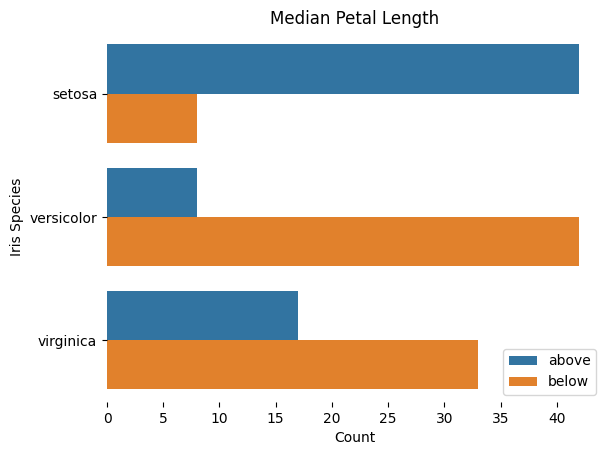

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import load_dataset

# Load iris dataset
iris = load_dataset('iris')

# Calculate the 75th percentile of sepal width
percentile_75_petal_length = iris['sepal_width'].quantile(0.5)

# Create a new column 'median_reference'
iris['median_reference'] = iris['sepal_width'].apply(lambda x: 'above' if x > percentile_75_petal_length else 'below')

# Create the barplot
barplot = sns.barplot(data=iris, y='species', x='petal_length', hue='median_reference', errorbar=None, estimator=len)

# Hide the spines
for spine in barplot.spines.values():
    spine.set_visible(False)

# Set the title and labels
barplot.set_title('Median Petal Length')
barplot.set_xlabel('Count')
barplot.set_ylabel('Iris Species')
plt.legend(loc='best')

# Display the plot
plt.show()


***
💡 <font color='blue'>__Insights__</font>
***

1.   Across all pickup boroughs, the yellow taxis are more expensive
2. In Queens the difference is much more dramaric (X3)


### Linear Relationship Plot

If we want to examine the linear relationhip between tow numerical variables, e can use `lmplot`

In [ ]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

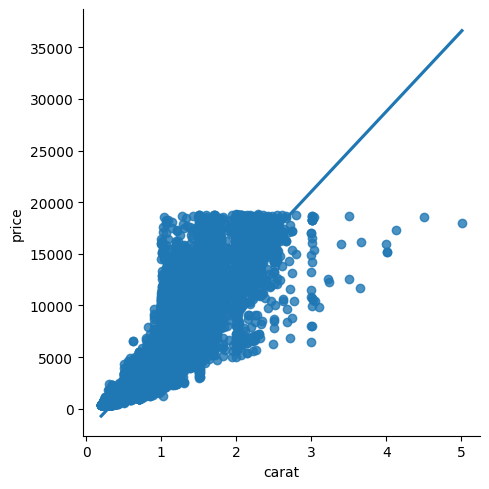

In [ ]:
sns.lmplot(data=diamonds, x='carat',y='price')
plt.show()

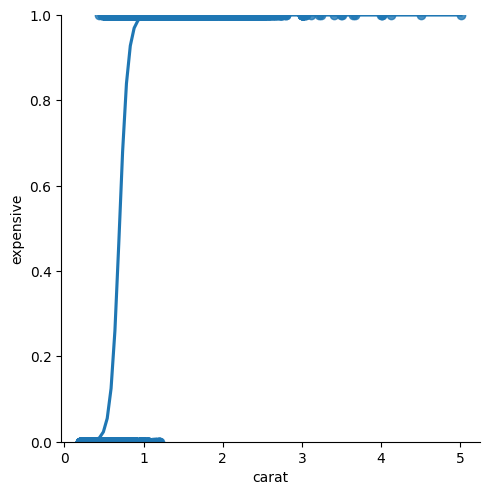

In [ ]:
diamonds['expensive'] = (diamonds['price'] > diamonds['price'].median()).astype(int)

# Create an lmplot for logistic regression
sns.lmplot(x="carat", y="expensive", data=diamonds, logistic=True, ci=None)

# Customize the plot
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.show()

The logistic regression curve showing the relationship between carat weight and the probability of being expensive. The curve typically shows an S-shape, starting low, increasing rapidly, and then plateauing.


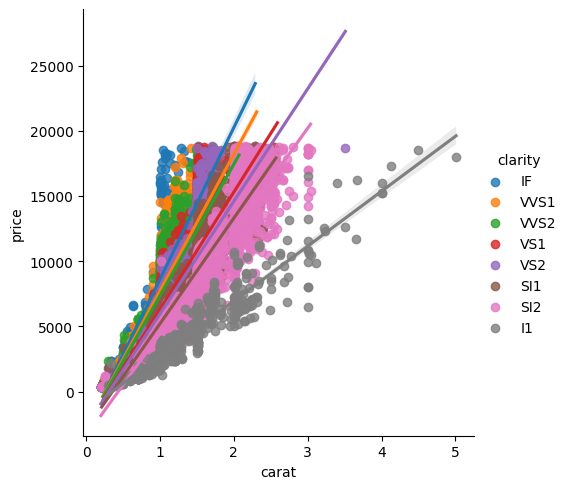

In [ ]:
sns.lmplot(data=diamonds, x='carat',y='price',hue='clarity')
plt.show()

<Figure size 500x800 with 0 Axes>

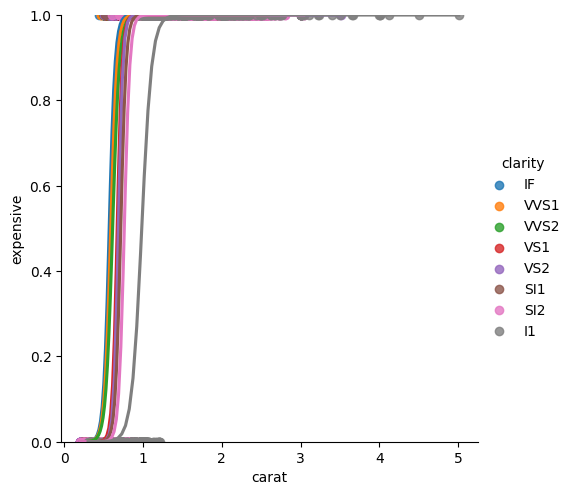

In [ ]:
plt.figure(figsize=(5, 8))
sns.lmplot(x="carat", y="expensive", data=diamonds, logistic=True, ci=None,hue='clarity')

# Customize the plot
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.show()

***
💡 <font color='blue'>__Insights__</font>
***

1.   The linear models of price vs carat, seems to have very similar slopes for almost all types of clarity, beside `I1` which seems that for each additional unit of carat, the price increases less than it would in othr clarity types


### `col` and `row` parameters

We can use `col` and `row` to create a matrix of plots for each combination of `cut` and `color`

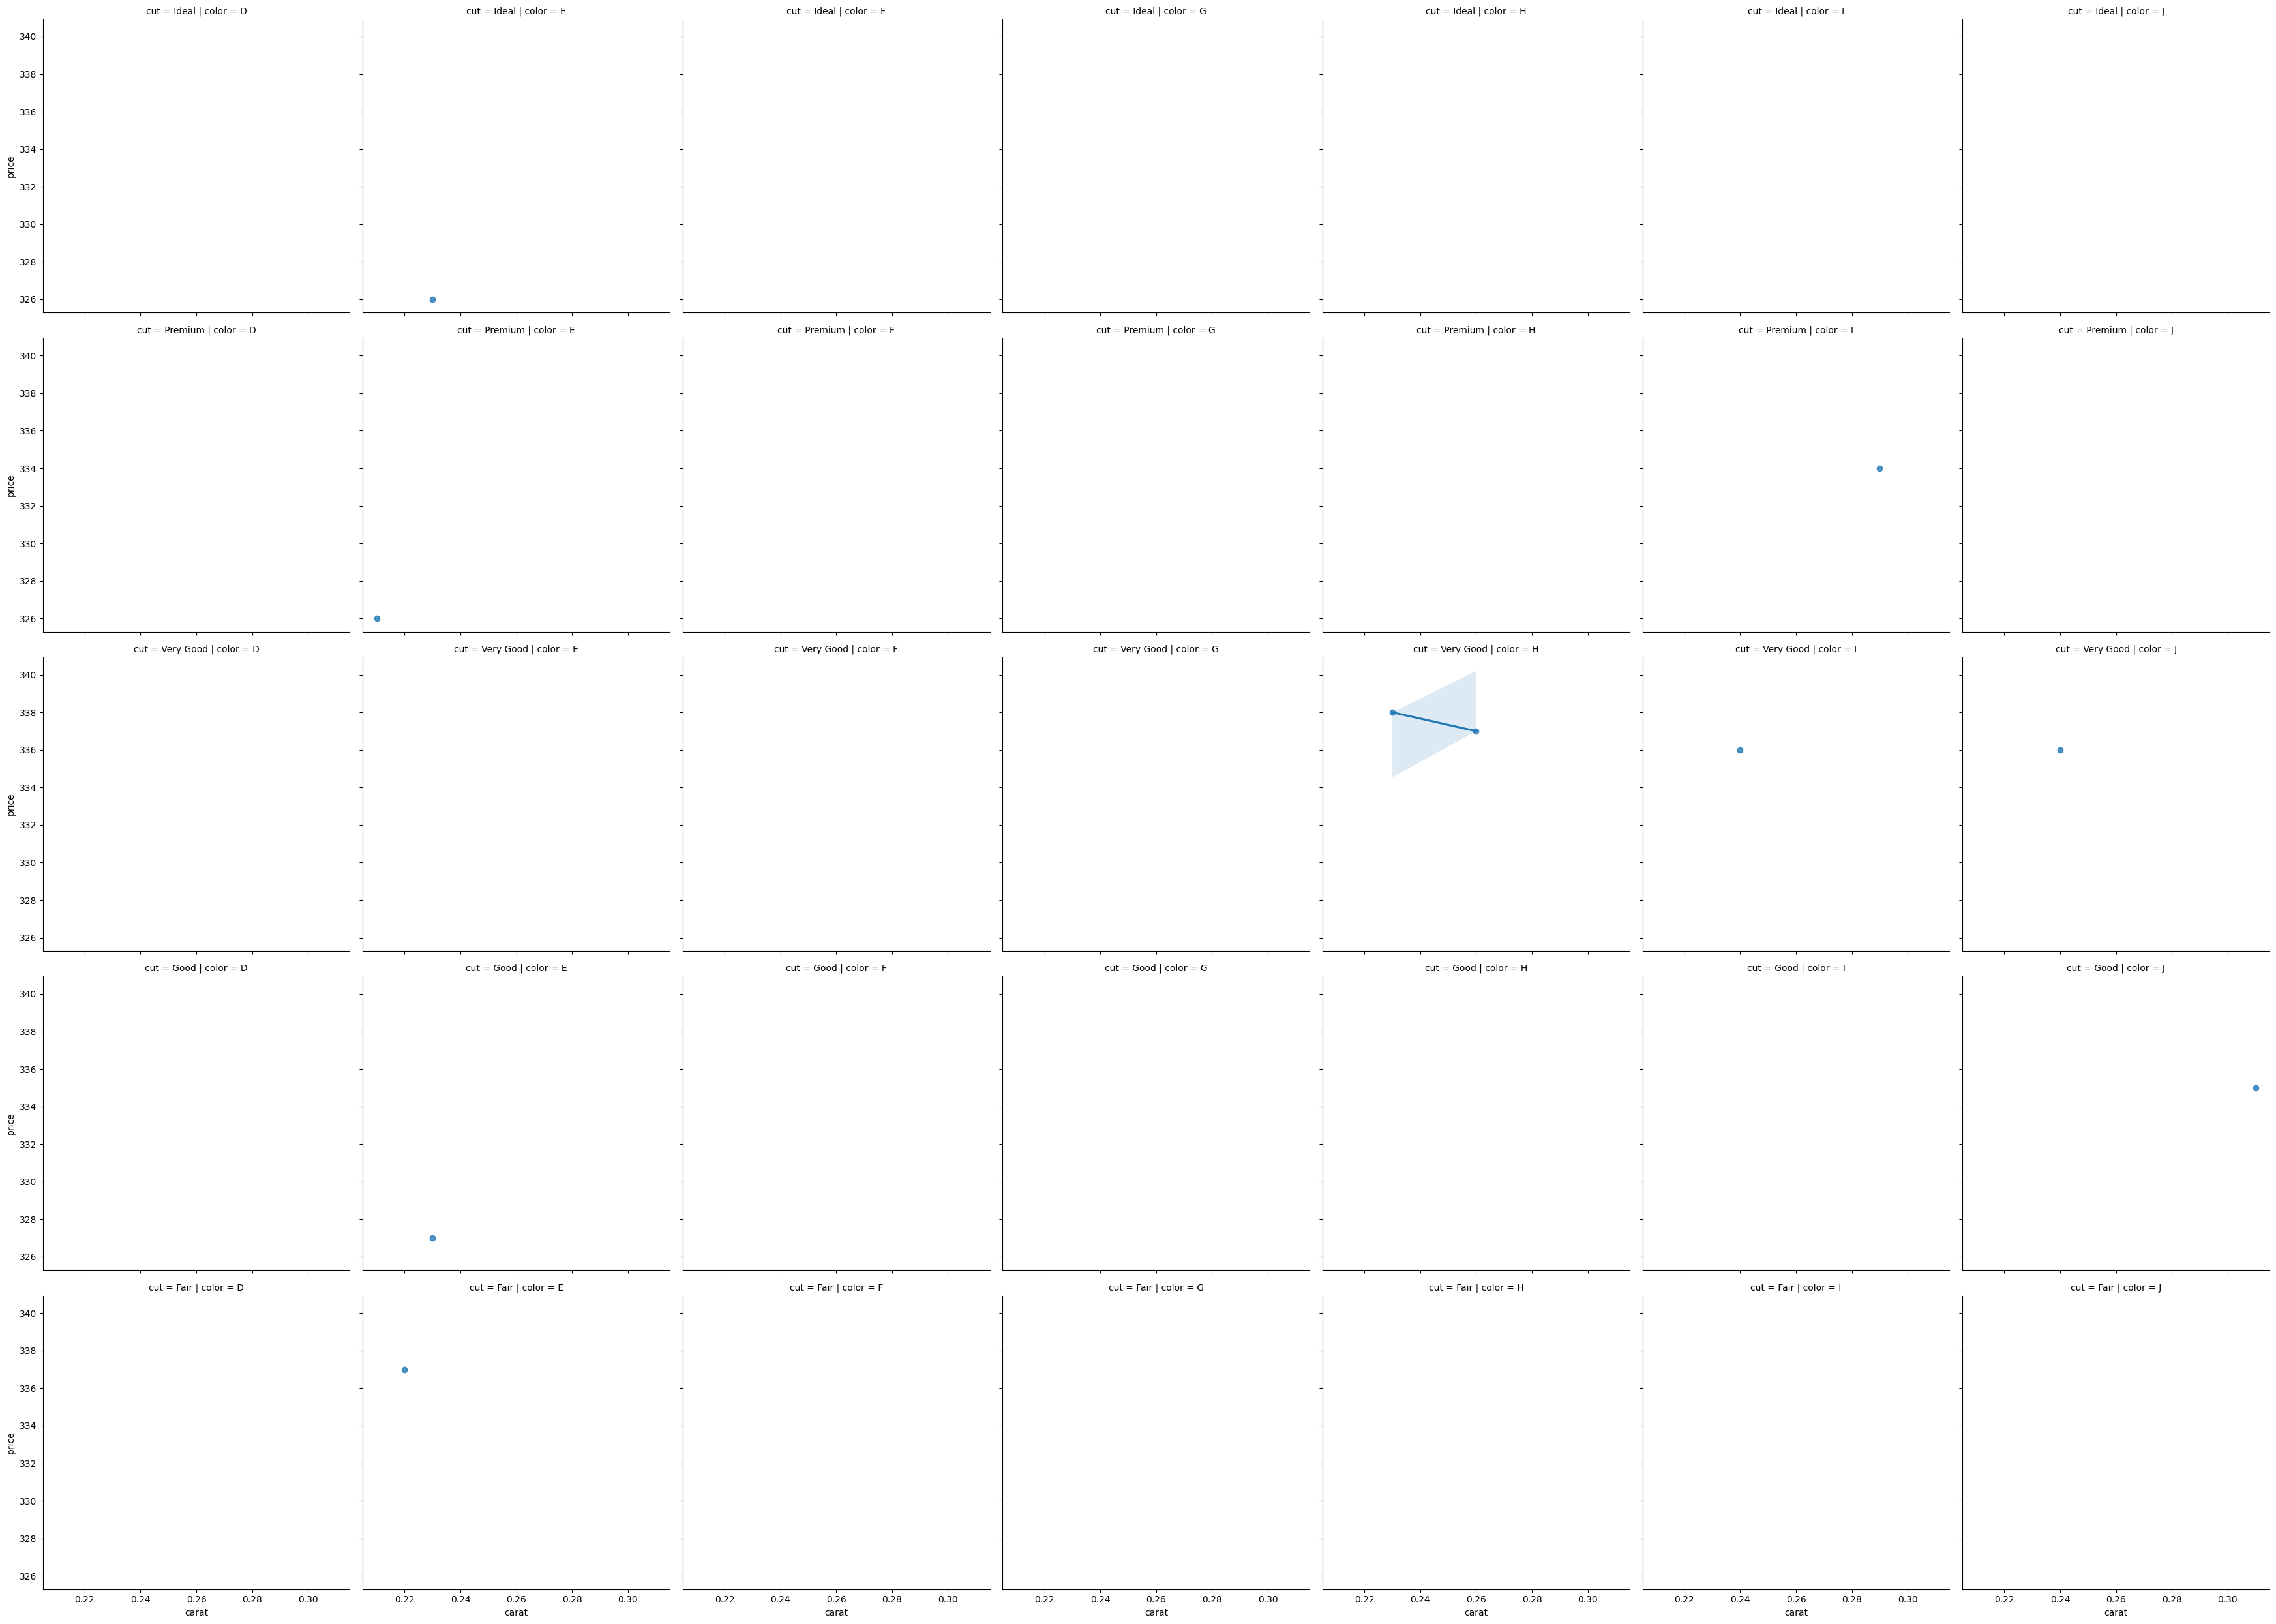

In [ ]:
sns.lmplot(data=diamonds.head(10), x='carat',y='price',row='cut',col='color')
plt.show()

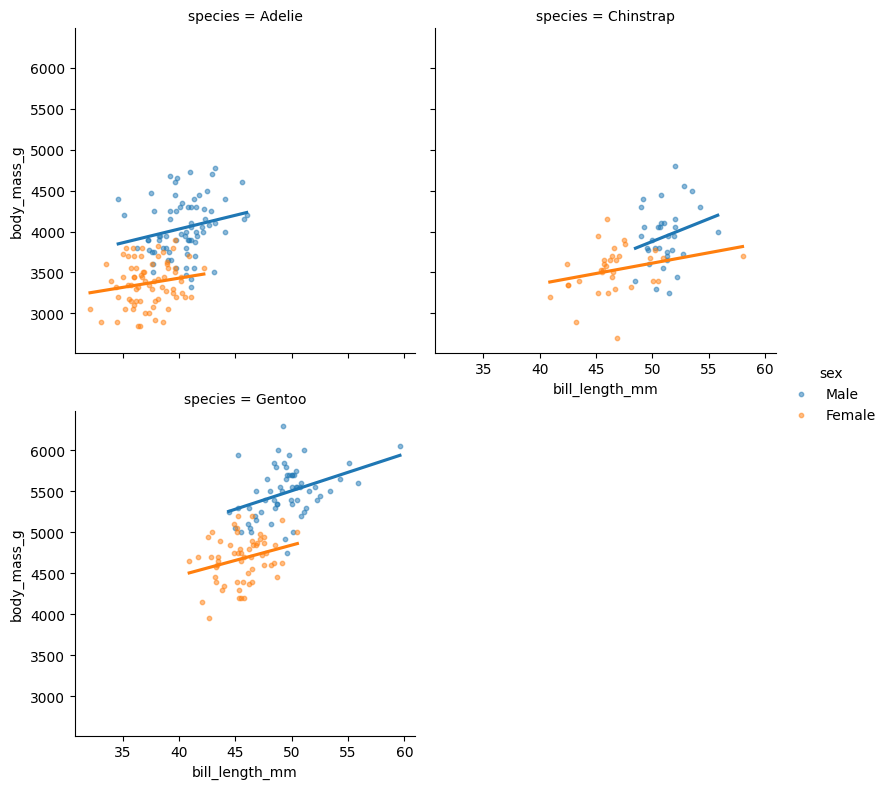

In [ ]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=penguins, x="bill_length_mm", y="body_mass_g", col="species", hue="sex",
     col_wrap=2, ci=None,
    height=4, scatter_kws={"s": 10, "alpha": 0.5}
)

plt.show()

### JointPlot

If we want to have a scatterplot that presents also the distributions of each numerical value I can use `jointplot`.

I suggest you to check jointplot's [documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html) to check the different parameters.

In [ ]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0       5.10000      3.50000       1.40000      0.20000  setosa
1       4.90000      3.00000       1.40000      0.20000  setosa
2       4.70000      3.20000       1.30000      0.20000  setosa
3       4.60000      3.10000       1.50000      0.20000  setosa
4       5.00000      3.60000       1.40000      0.20000  setosa

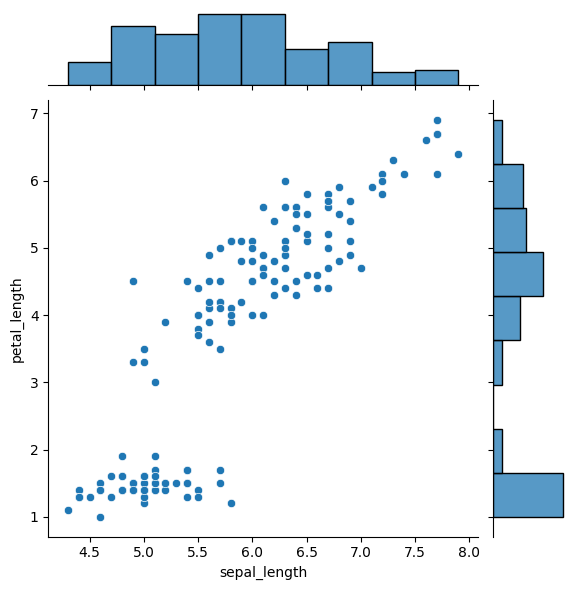

In [ ]:
from scipy.stats import pearsonr, spearmanr

sns.jointplot(
    x='sepal_length',
    y='petal_length',
    data=iris,
    # hue='species'
)

pearson_corr, _ = pearsonr(iris['sepal_length'], iris['petal_length'])
print(f'Pearson correlation: {pearson_corr}')

# Calculate the Spearman correlation
spearman_corr, _ = spearmanr(iris['sepal_length'], iris['petal_length'])
print(f'Spearman correlation: {spearman_corr}')
plt.show()

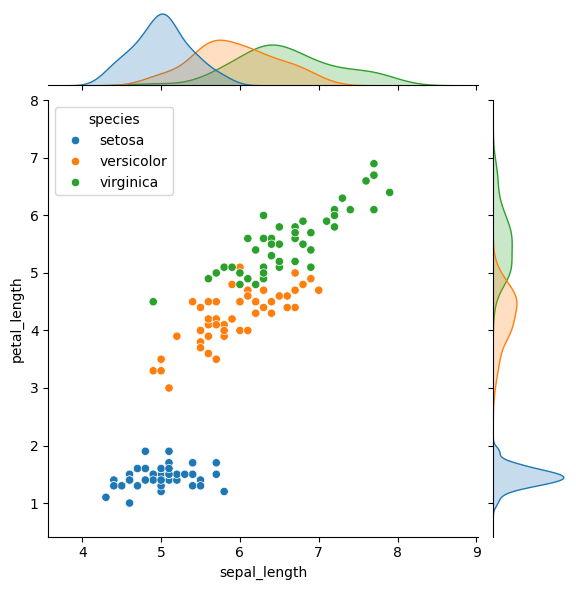

In [ ]:
sns.jointplot(
    x='sepal_length',
    y='petal_length',
    data=iris,
    hue='species'
)
plt.show()

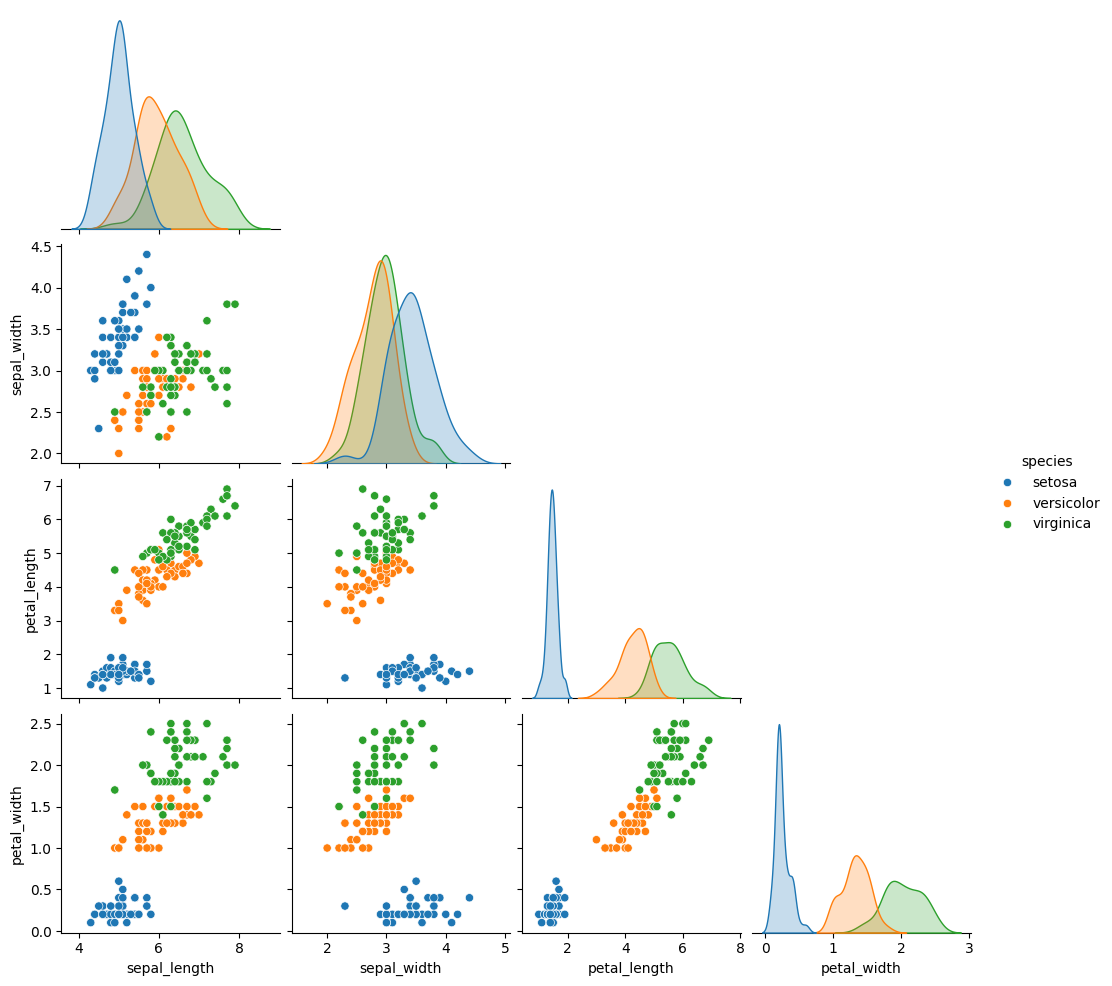

In [ ]:
sns.pairplot(data=iris, corner=True,hue='species')
plt.show()

### Heatmap

*** החלק של מפת החום לא גמור
אני מראה אן כרגע רק אופציה אחת ויש עוד אופציה שצריך להראות

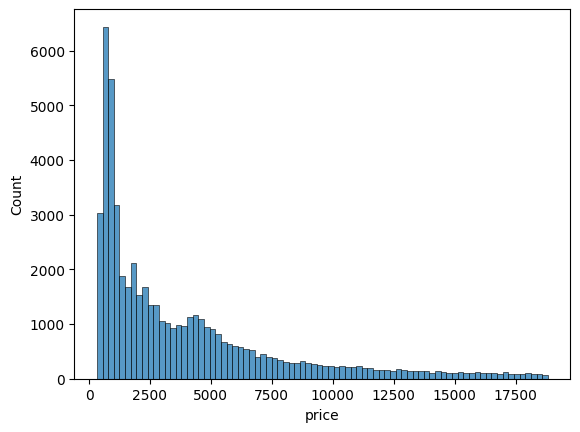

In [ ]:
sns.histplot(data=diamonds, x='price')
plt.show()

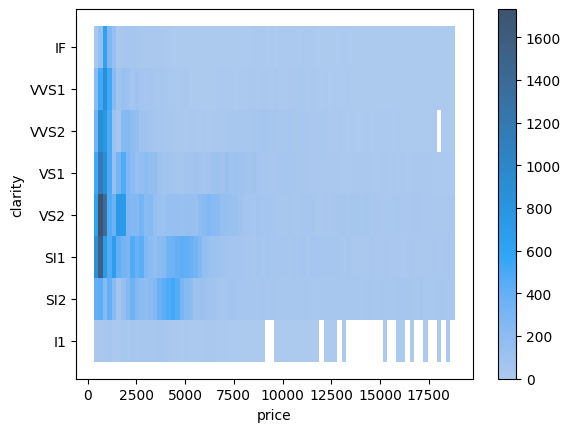

In [ ]:
sns.histplot(data=diamonds, x='price',y='clarity',cbar=True)
plt.show()

### Paralel Line Cahrt

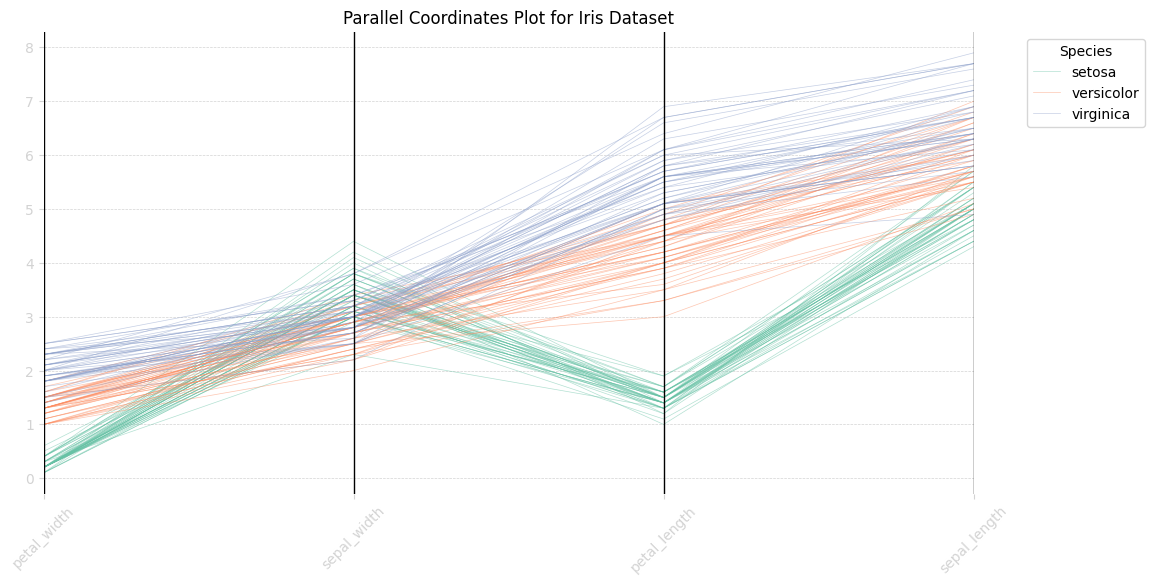

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Calculate median of numeric features only
feature_medians = iris.drop('species', axis=1).median().sort_values()

# Sort features based on median values
sorted_features = feature_medians.index.tolist()

# Add 'species' to the end of the list for use in parallel_coordinates
sorted_features.append('species')

# Reorder dataframe based on sorted features
iris_sorted = iris[sorted_features]

# Plotting using parallel_coordinates
# Plotting using parallel_coordinates with custom colors
fig, ax = plt.subplots(figsize=(12, 6))

parallel_coordinates(iris_sorted, 'species', color=sns.color_palette("Set2"),alpha = 0.5, linewidth = 0.5)

plt.title('Parallel Coordinates Plot for Iris Dataset')


# Remove the borders of the plot
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.xaxis.label.set_color('lightgray')
ax.yaxis.label.set_color('lightgray')

ax.tick_params(axis='x', colors='lightgray')
ax.tick_params(axis='y', colors='lightgray')

# Change the color of the gridlines (vertical axes) to light gray
ax.xaxis.set_tick_params(color='lightgray', labelcolor='lightgray')
ax.yaxis.set_tick_params(color='lightgray', labelcolor='lightgray')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.5)

# Adjust legend
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


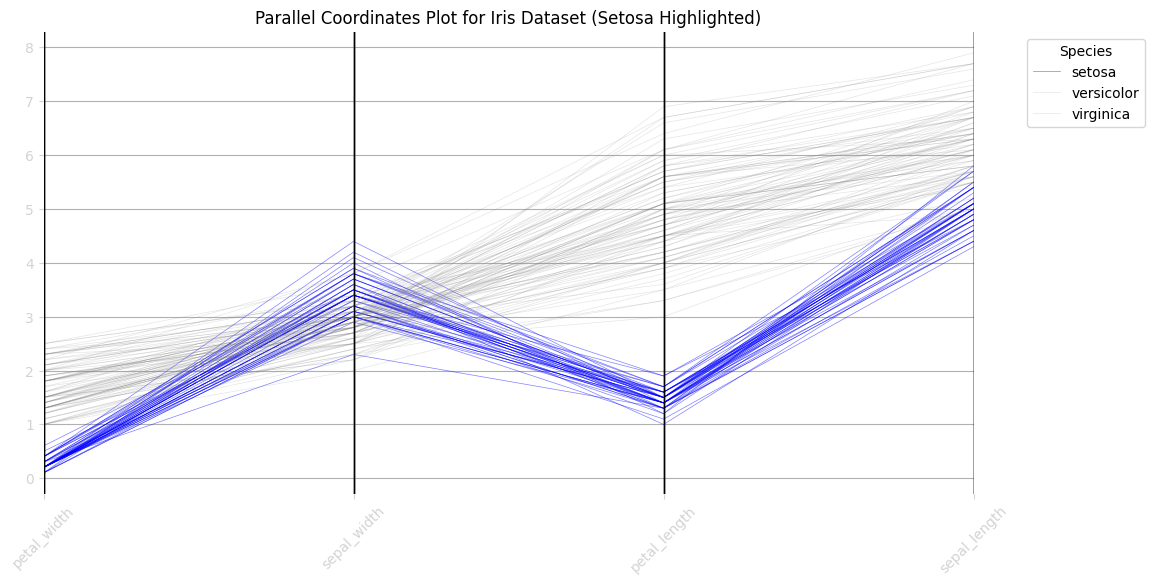

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Calculate median of numeric features only
feature_medians = iris.drop('species', axis=1).median().sort_values()

# Sort features based on median values
sorted_features = feature_medians.index.tolist()

# Add 'species' to the end of the list for use in parallel_coordinates
sorted_features.append('species')

# Reorder dataframe based on sorted features
iris_sorted = iris[sorted_features]

# Define the species to color and grayscale for others
target_species = 'Iris-setosa'  # Replace with your desired species

def color_selection(row):
  if row['species'] == target_species:
    return 'blue'  # Choose your desired color for the target species
  else:
    return 'gray'  # Grayscale for other species

# Plotting using parallel_coordinates with custom coloring function
# Plotting using parallel_coordinates with custom colors
fig, ax = plt.subplots(figsize=(12, 6))

parallel_coordinates(iris_sorted[iris_sorted['species'] == 'setosa'], 'species', color='blue', alpha=0.5, linewidth = 0.5)
parallel_coordinates(iris_sorted[iris_sorted['species'] != 'setosa'], 'species', color='gray', alpha=0.2, linewidth = 0.5)

# Remove the borders of the plot
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


ax.xaxis.label.set_color('lightgray')
ax.yaxis.label.set_color('lightgray')

ax.tick_params(axis='x', colors='lightgray')
ax.tick_params(axis='y', colors='lightgray')


# Adjust legend
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Parallel Coordinates Plot for Iris Dataset (Setosa Highlighted)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


### Relplot

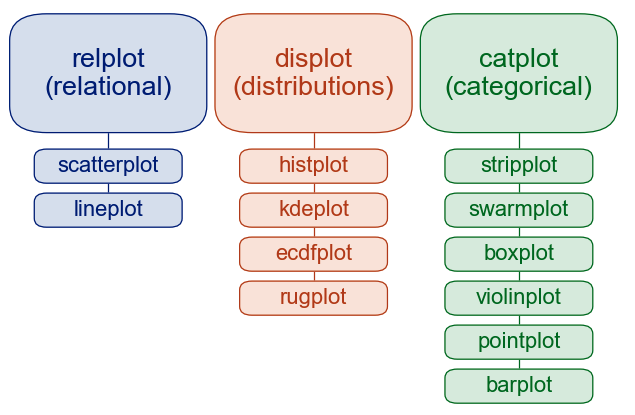


### Distplot

### Catplot

### FascetGrid

### Dual Axis

## Dumbbell Plot

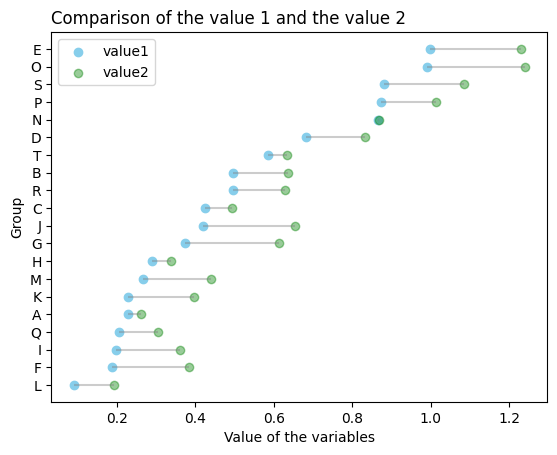

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })

# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='value1')
my_range=range(1,len(df.index)+1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='value2')
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Group')

# Show the graph
plt.show()